### Configuration

In [1]:
args = {
  'country': 'united_states',
  'currency': 'USD',
  'start_year': 1960,
  'end_year': 2020, # exclusive
  'bubble_scale': 0.5,
  'bubble_min_count': 100,
  'all': False,
}

### Libraries

In [20]:
import importlib

import constants.firm as FirmConstants
import constants.funding as FundingConstants
import constants.visual as VisualConstants

import models.firm as FirmModel
import models.funding as FundingModel
import models.investor as InvestorModel

import utils.dataframe as DataframeUtils
import utils.common as CommonUtils
import utils.file as FileUtils

import visual.visualiser as Visualiser
import visual.firm as FirmVisuals
import visual.funding as FundingVisuals
import visual.industry as IndustryVisuals
import visual.macro as MacroVisuals

### Load Data

#### Load Investor Data

In [3]:
# Read Investor Data
investors = FileUtils.read_pickle(f"investors")

In [4]:
# Get Public Funded Investors
public_funded_investors = InvestorModel.get_public_funded_investors(investors)

#### Load Company Data

In [5]:
# Read Company Data
firms = FileUtils.read_pickle(f"{args['country']}_firms")

In [6]:
# Read Domain Data
domain_created_year = FileUtils.read_pickle('domain_created_year')

In [7]:
# Update Company Data
firms = FirmModel.enrich_founded_year(firms, domain_created_year)
firms = FirmModel.enrich_public_funded(firms, public_funded_investors)
firms = FirmModel.filter_for_profit(firms)
firms = FirmModel.filter_founded_year(firms, args['start_year'], args['end_year'])
firms = firms.reset_index(drop=True)

#### Load Funding Data

In [8]:
# Read Funding Data
funding = FileUtils.read_pickle(f"funding")

In [9]:
# Update Funding Data
funding = FundingModel.enrich_public_funded(funding, public_funded_investors)
funding = FundingModel.filter_announced_year(funding, args['start_year'], args['end_year'])
funding = FundingModel.filter_currency(funding, 'USD')


#### Load Macro Data

In [10]:
# Read Macro Data
real_gdp = FileUtils.read_pickle('real_gdp')
fed_rate = FileUtils.read_pickle('fed_rate')

In [11]:
# Update Macro Data
real_gdp = real_gdp['United States']
real_gdp = real_gdp[real_gdp.index >= args['start_year']]
real_gdp = real_gdp[real_gdp.index < args['end_year']]

fed_rate = fed_rate['Fed Rate']
fed_rate = fed_rate[fed_rate.index >= args['start_year']]
fed_rate = fed_rate[fed_rate.index < args['end_year']]

In [12]:
importlib.reload(MacroVisuals)
# Store Macro Data
macro = MacroVisuals.Macro(real_gdp, fed_rate)

### Macro

In [13]:
if args['all']:
  macro.plot()

### Companies: All

In [14]:
if args['all']:
  FirmVisuals.plot(firms, macro)
  FirmVisuals.plot_macro(firms, macro)
  FirmVisuals.plot_STEM(firms, macro)
  FirmVisuals.plot_STEM_macro(firms, macro)
  FirmVisuals.plot_public_funded(firms, macro)
  FirmVisuals.plot_public_funded_macro(firms, macro)
  # FirmVisuals.stack_STEM_public_funded(firms)

### Companies: By Industry Group

/Users/celine/Projects/IO/src/visual/visualiser.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


{'Professional Services': 169381, 'Software': 161265, 'Other': 128819, 'Health Care': 126885, 'Real Estate': 119050, 'Financial Services': 117619, 'Information Technology': 116984, 'Manufacturing': 107231, 'Media and Entertainment': 104161, 'Sales and Marketing': 103678, 'Commerce and Shopping': 92150, 'Internet Services': 83194, 'Science and Engineering': 73658, 'Design': 73641, 'Hardware': 73240, 'Transportation': 52319, 'Advertising': 50705, 'Administrative Services': 48441, 'Education': 43934, 'Data and Analytics': 43606, 'Community and Lifestyle': 36955, 'Food and Beverage': 35596, 'Content and Publishing': 34354, 'Consumer Electronics': 31674, 'Consumer Goods': 29464, 'Mobile': 29287, 'Privacy and Security': 25571, 'Sports': 25032, 'Lending and Investments': 22501, 'Apps': 22497.0, 'Energy': 21881, 'Sustainability': 20933, 'Biotechnology': 17702, 'Video': 17553, 'Natural Resources': 17144, 'Events': 16824, 'Travel and Tourism': 15498, 'Clothing and Apparel': 15234, 'Music and Aud

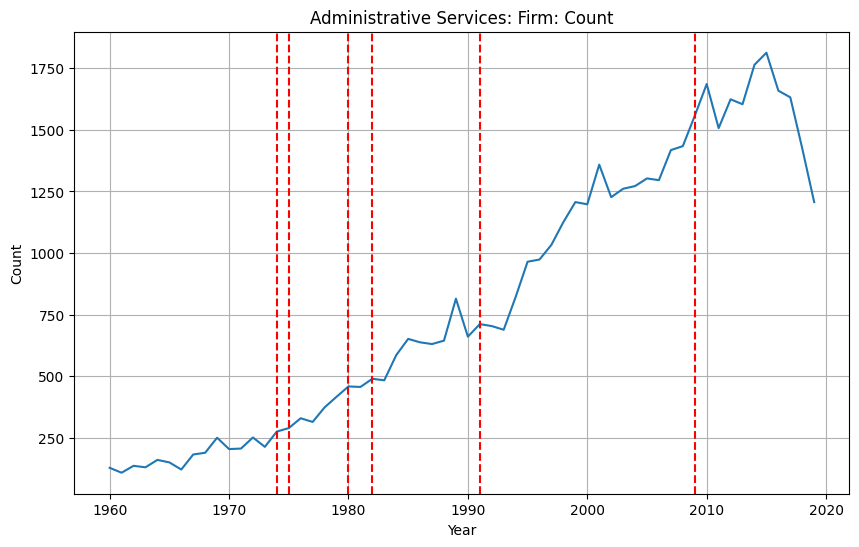

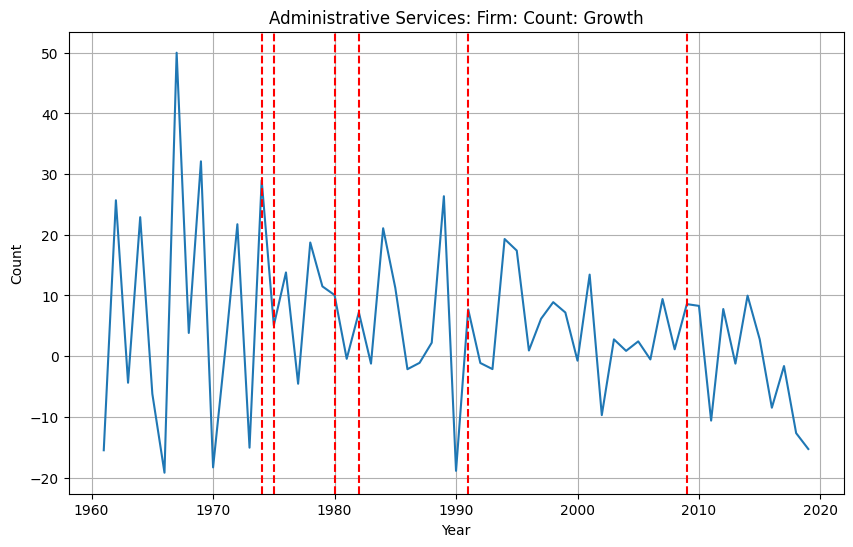

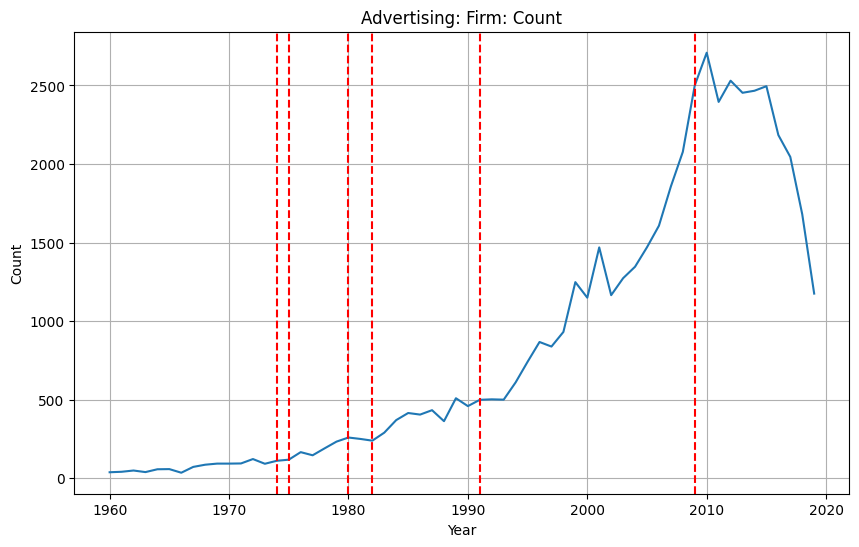

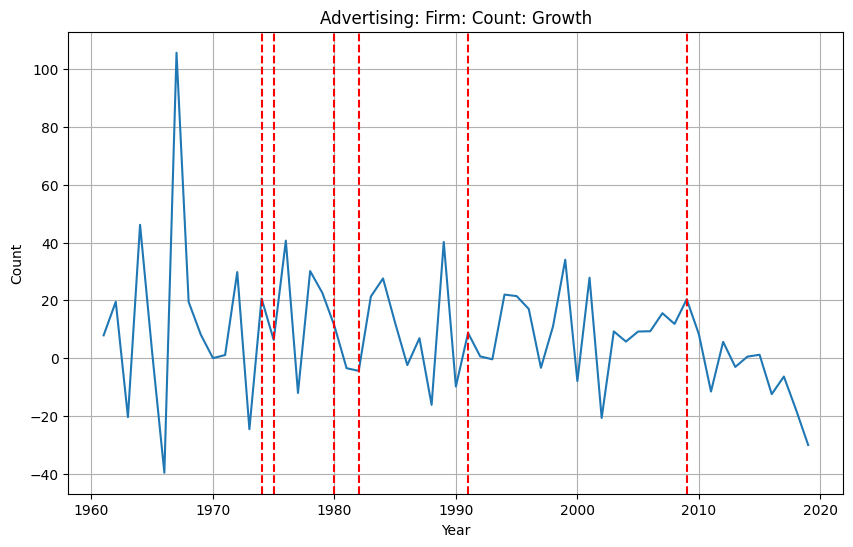

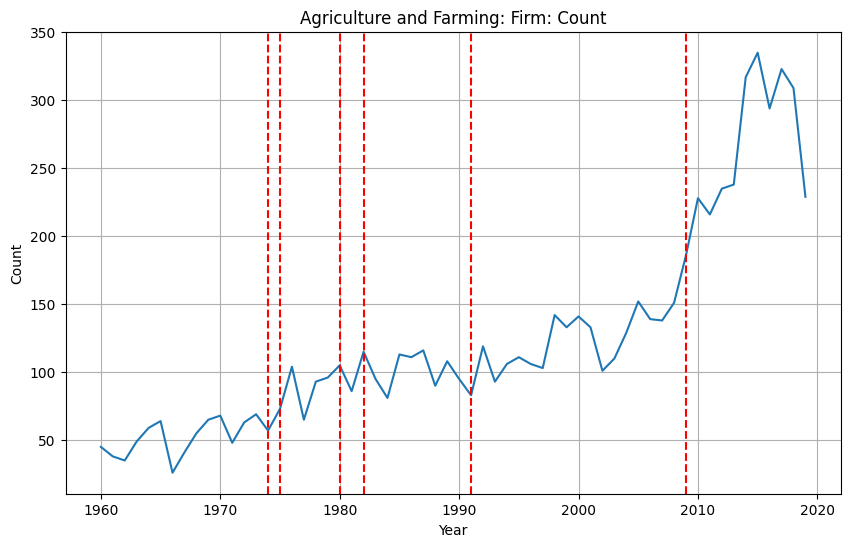

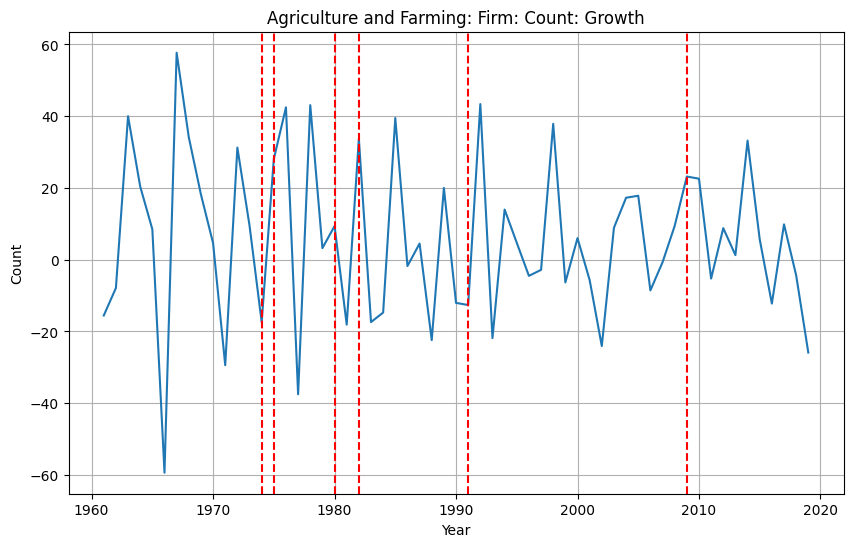

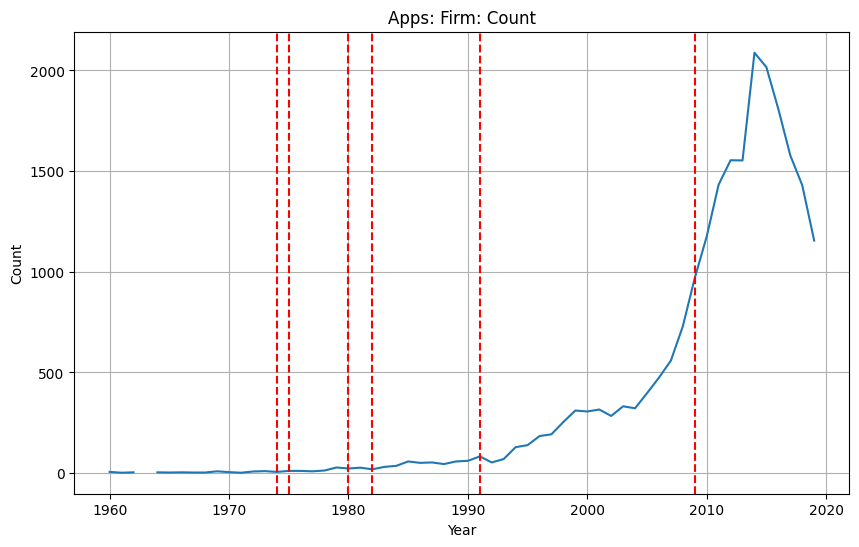

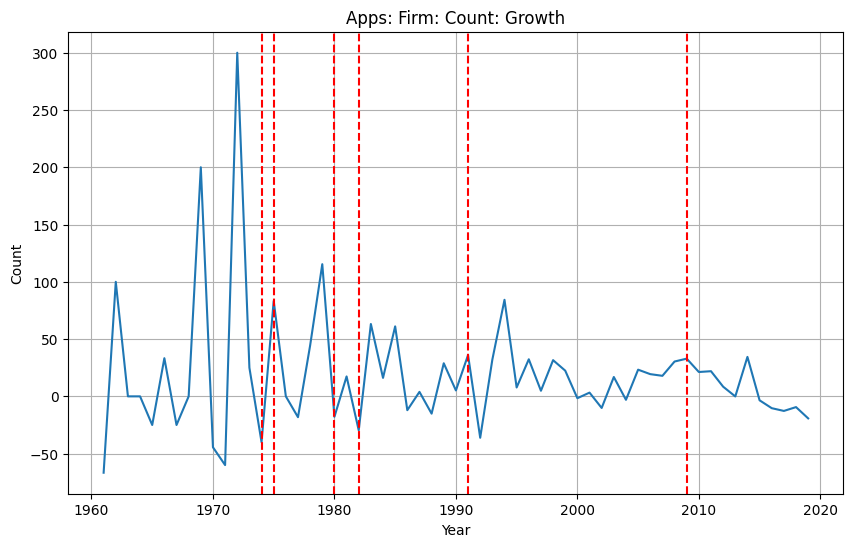

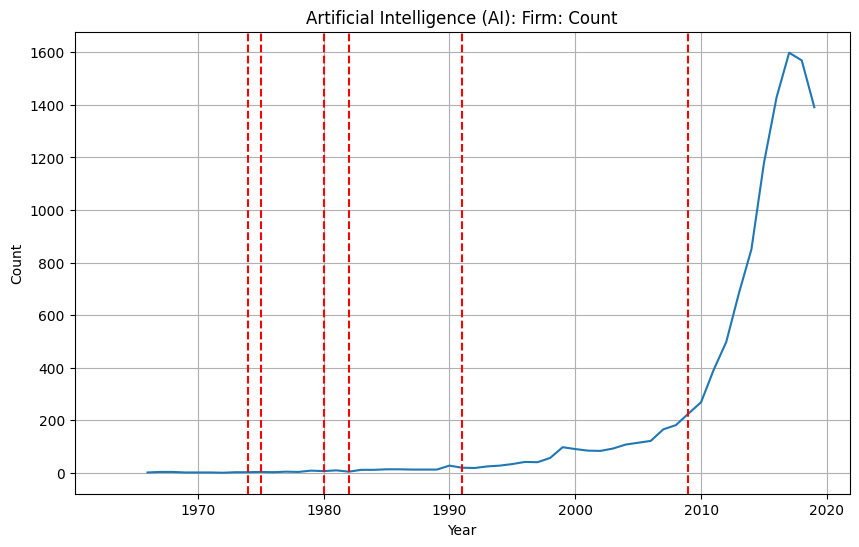

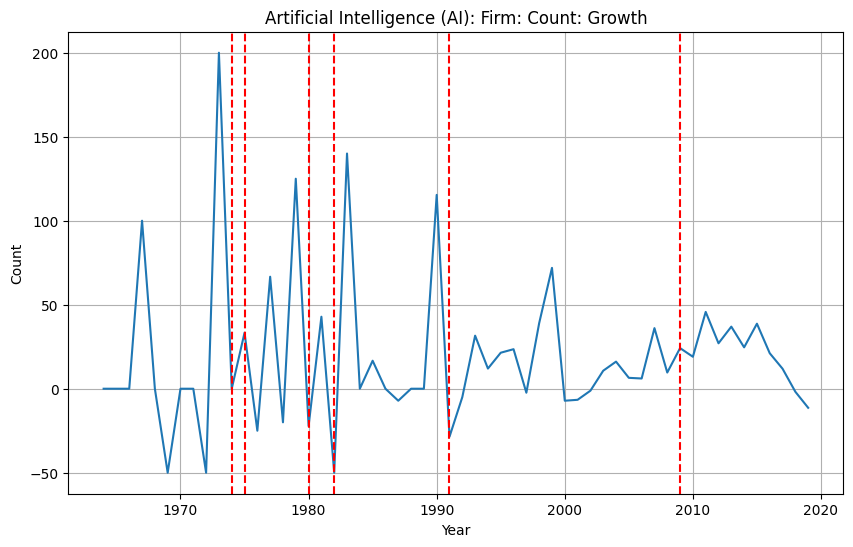

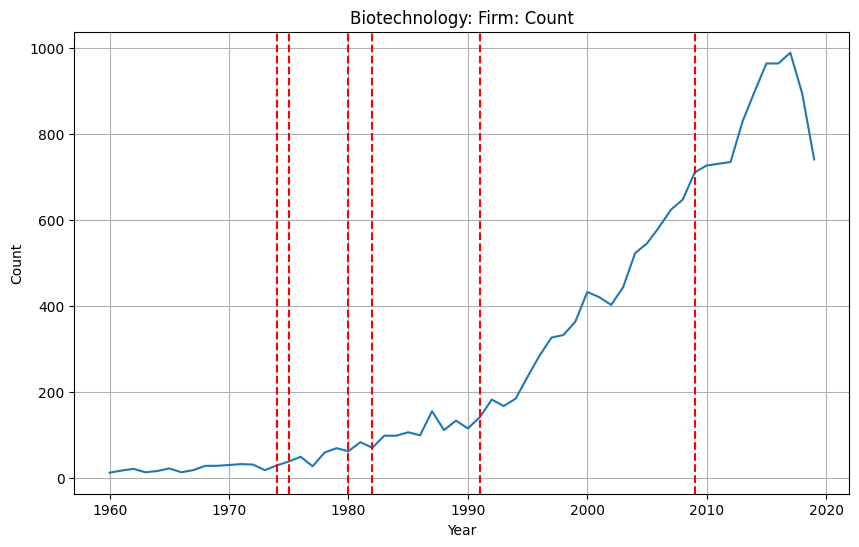

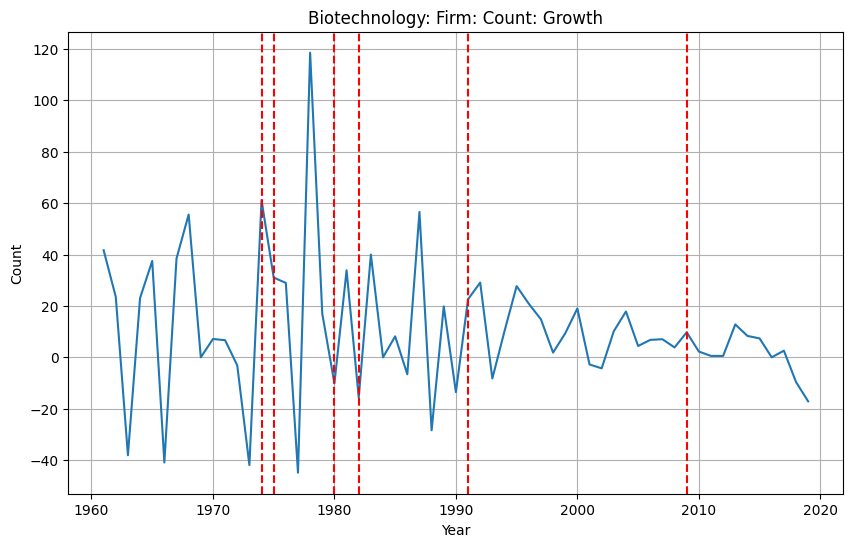

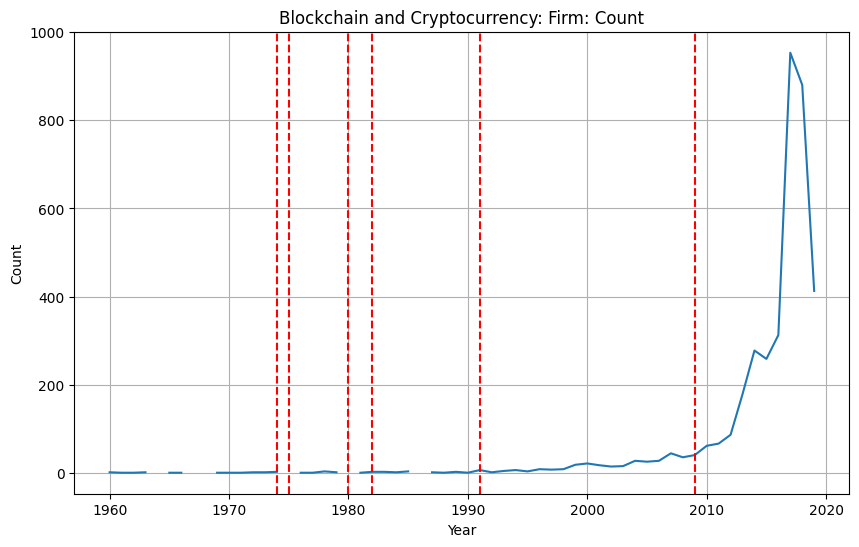

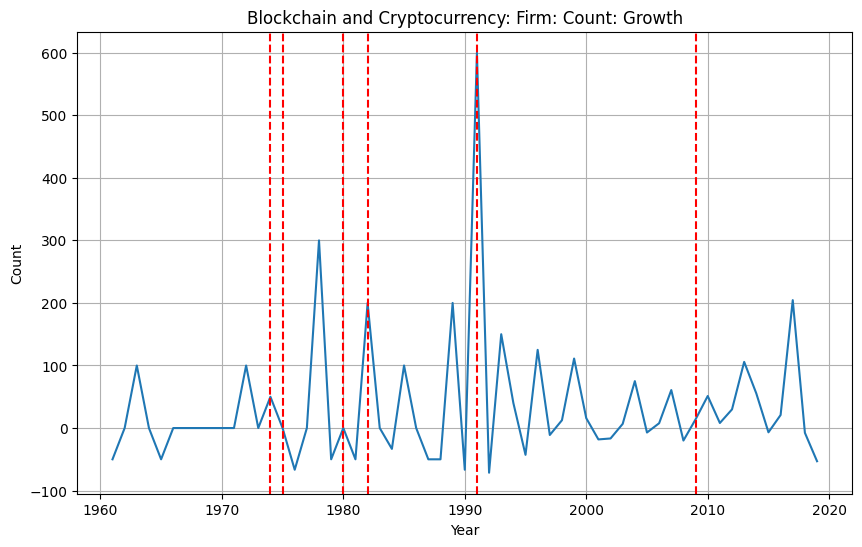

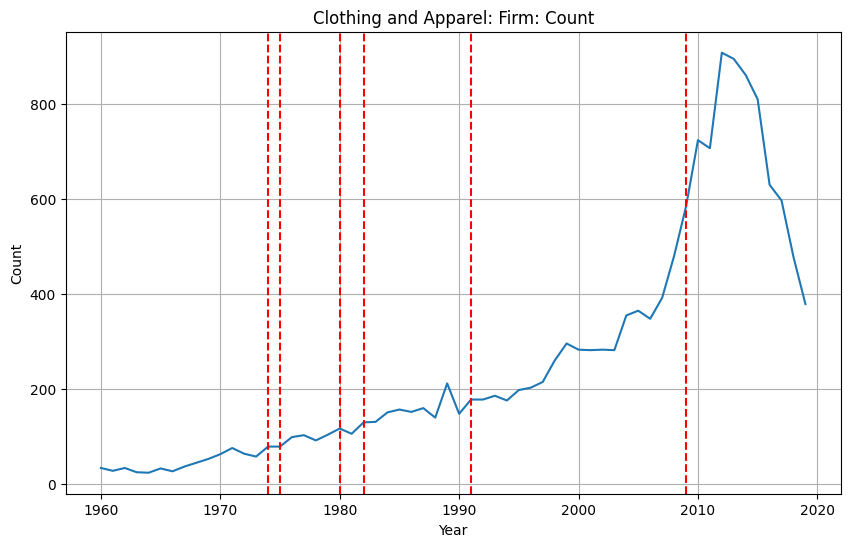

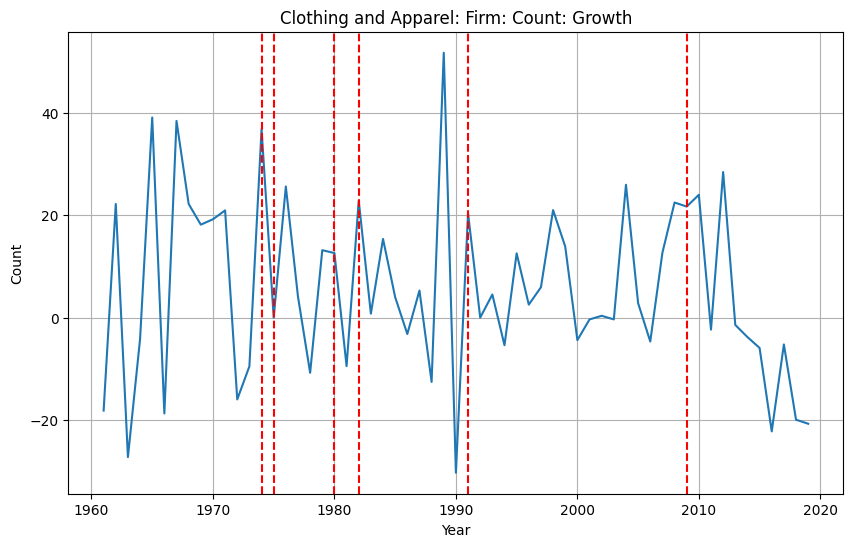

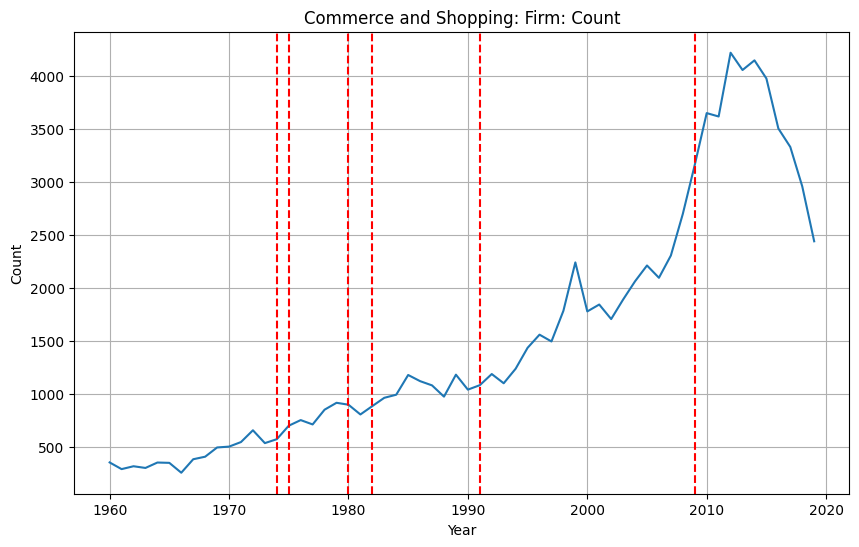

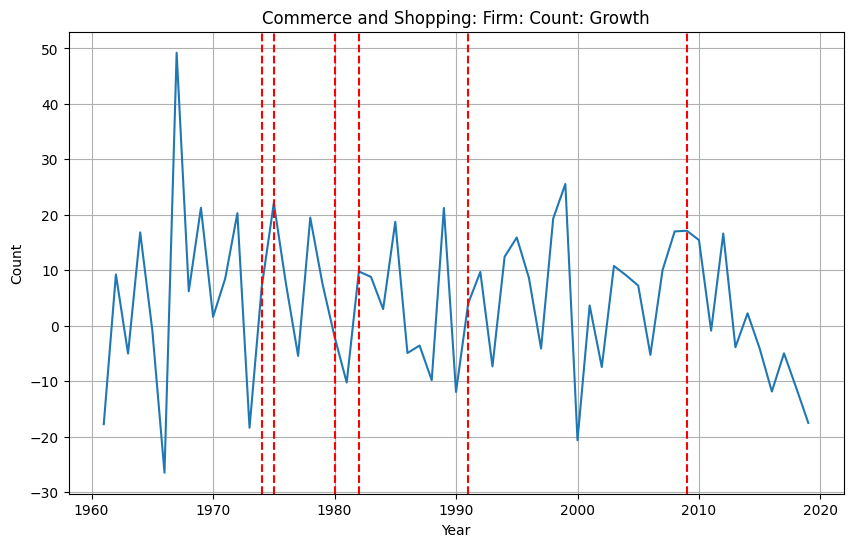

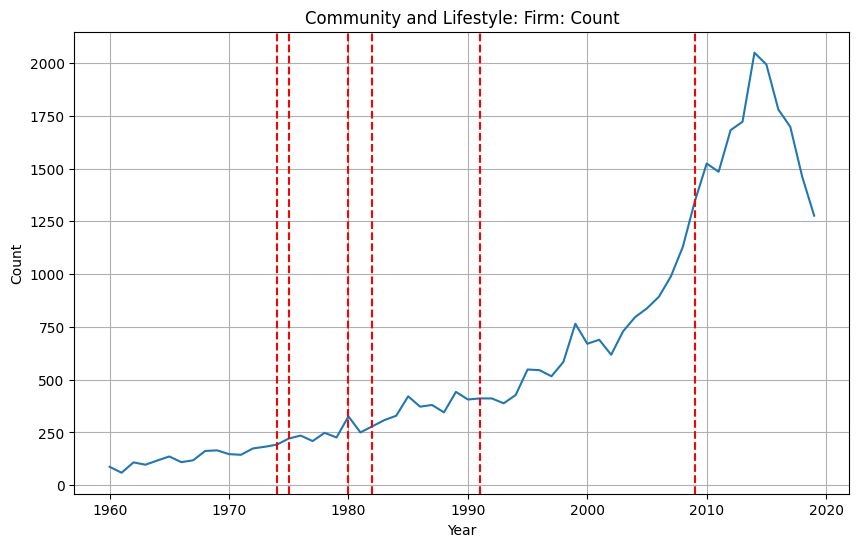

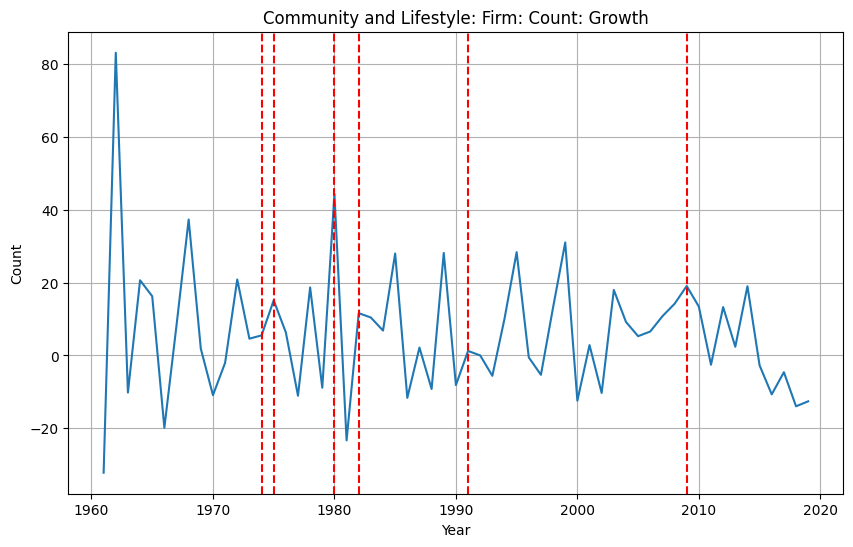

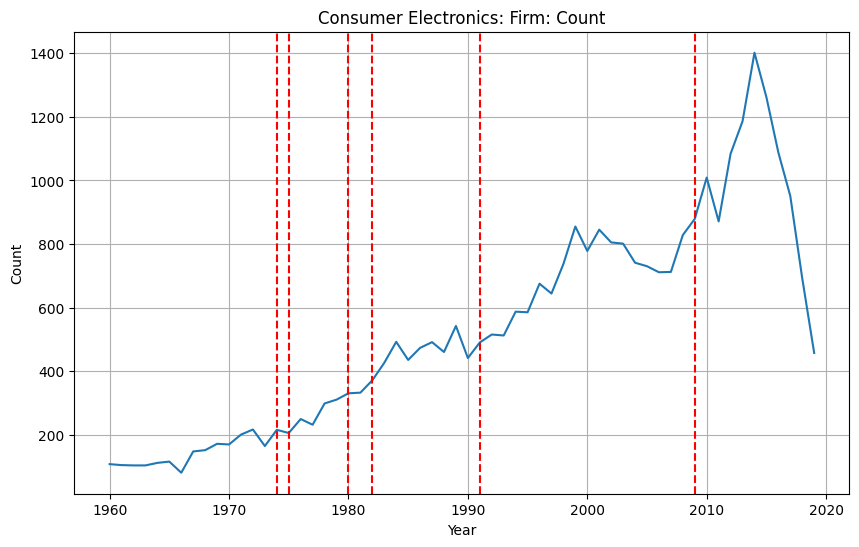

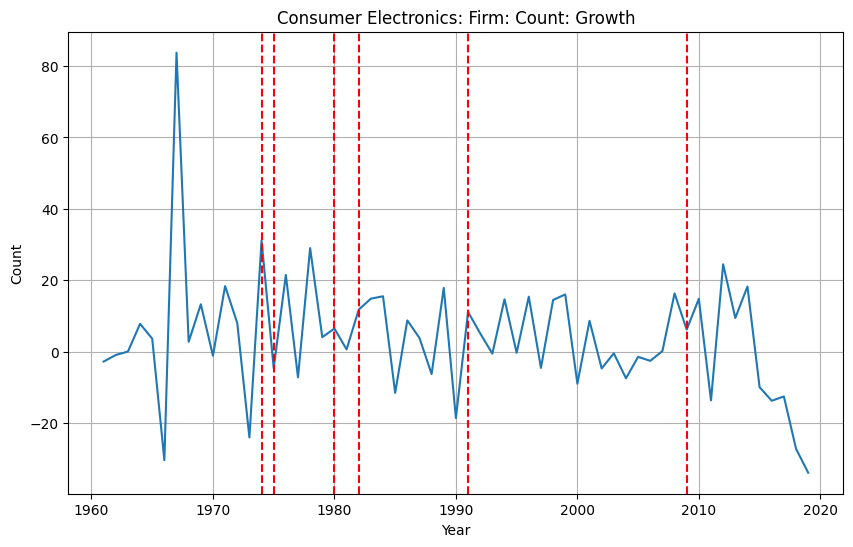

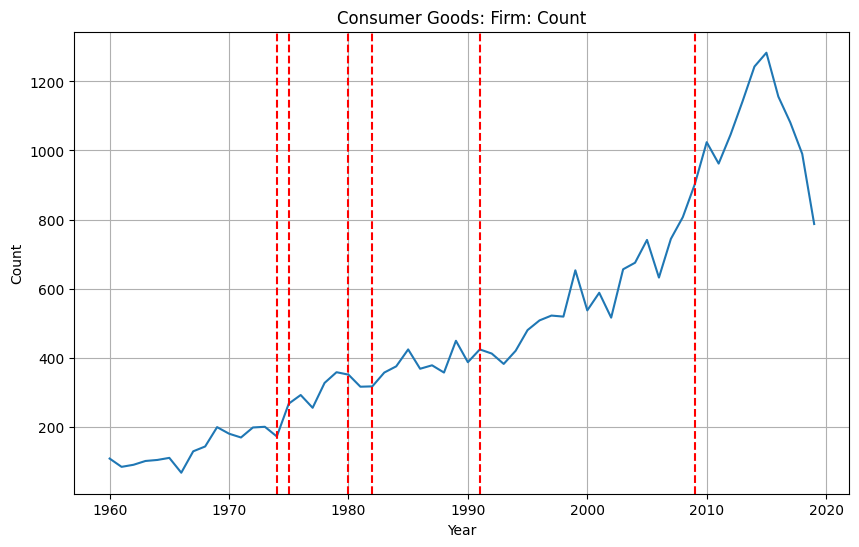

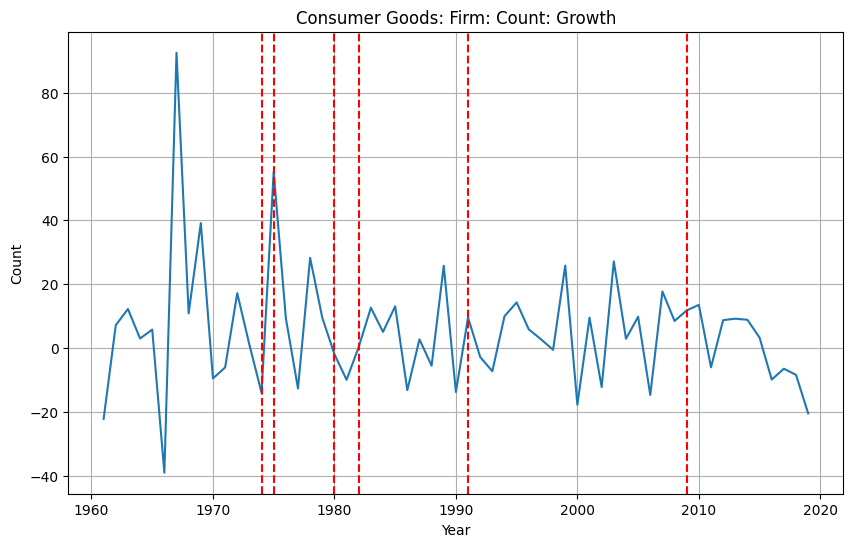

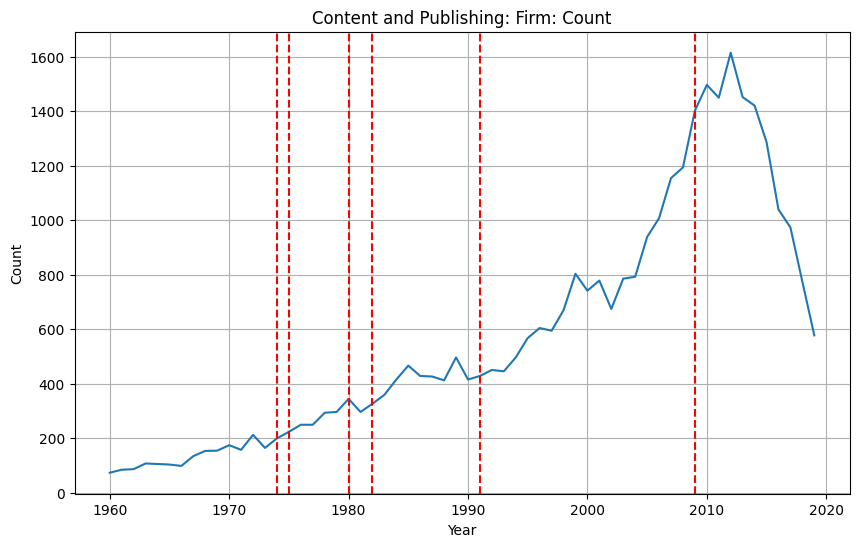

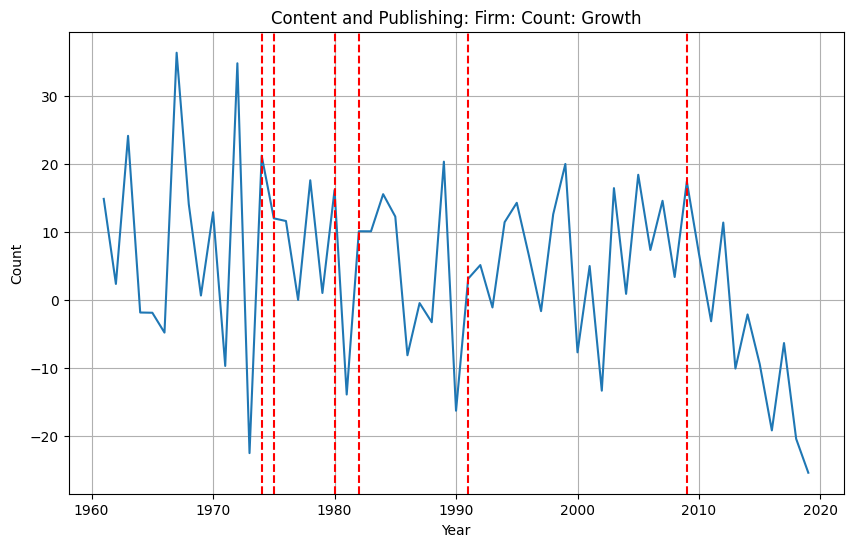

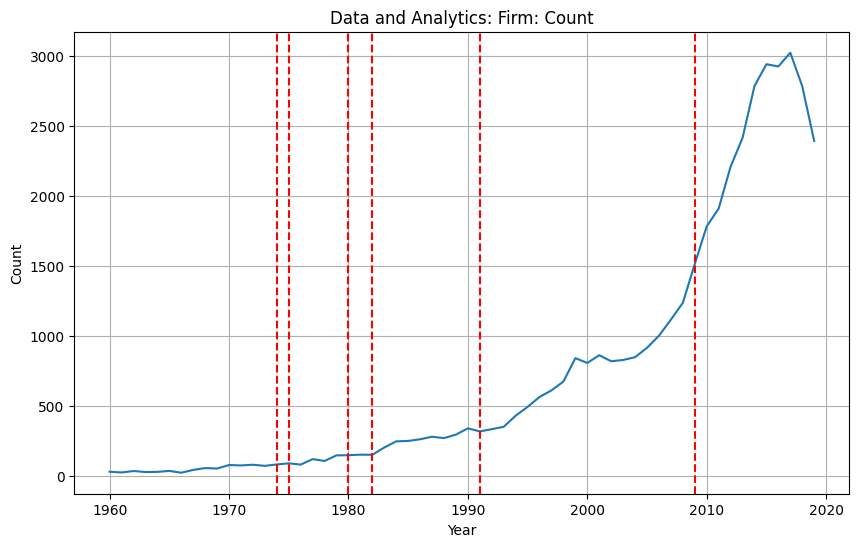

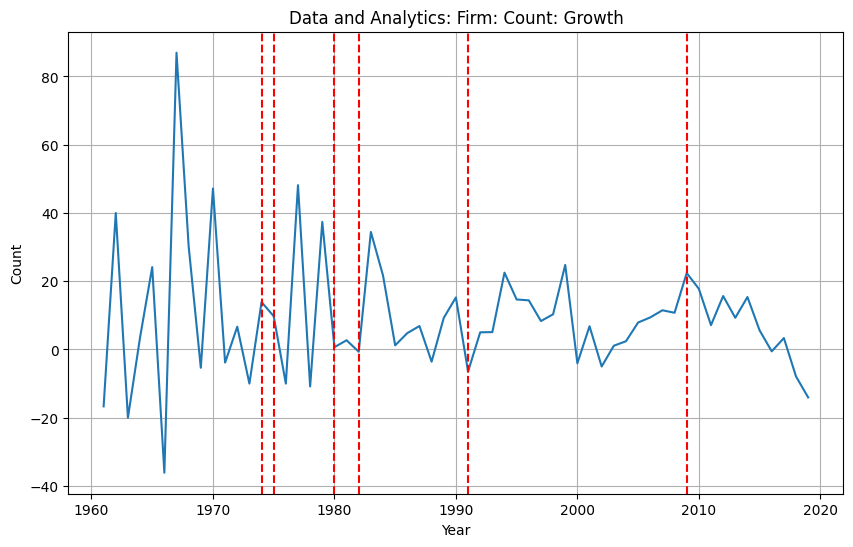

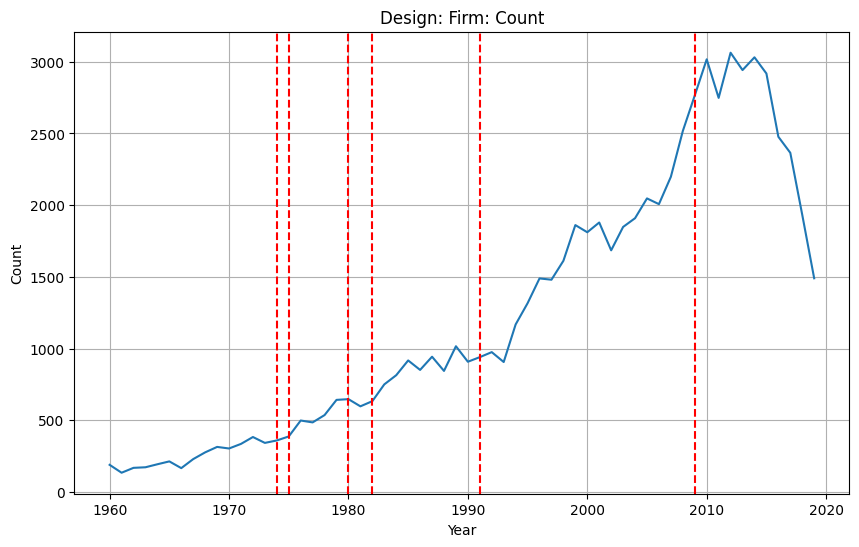

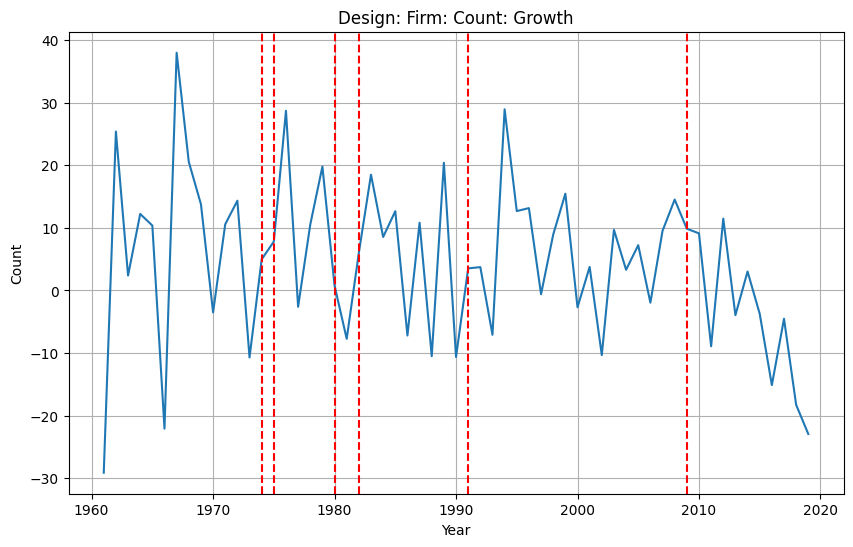

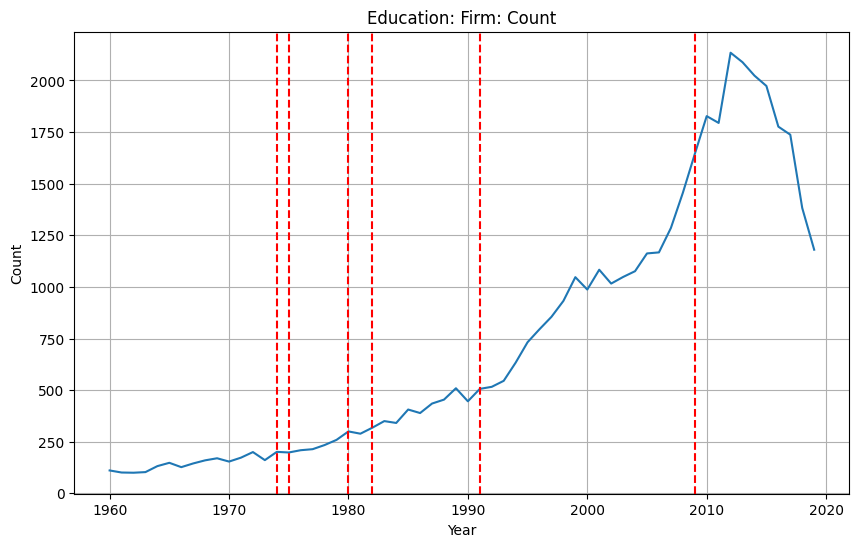

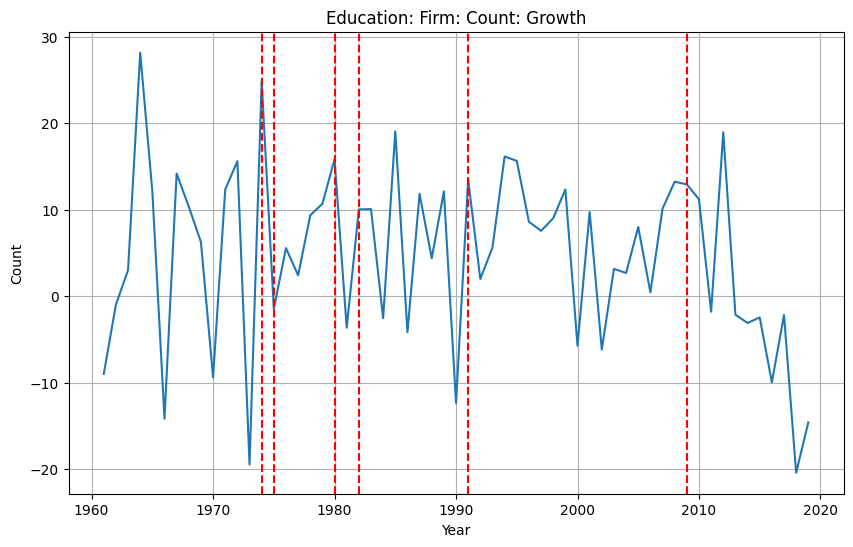

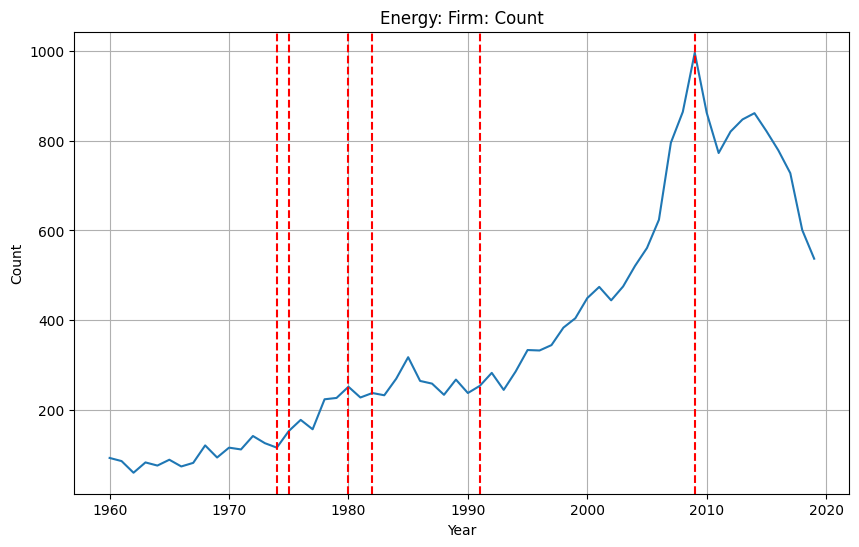

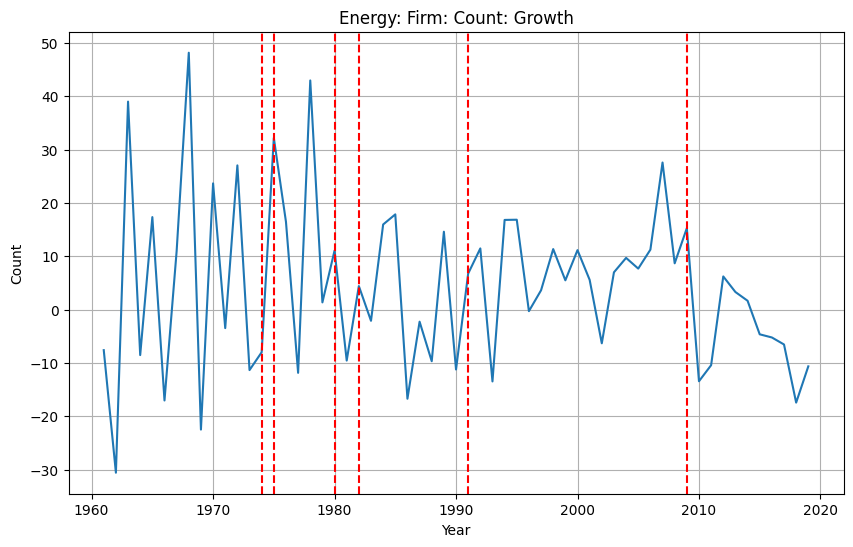

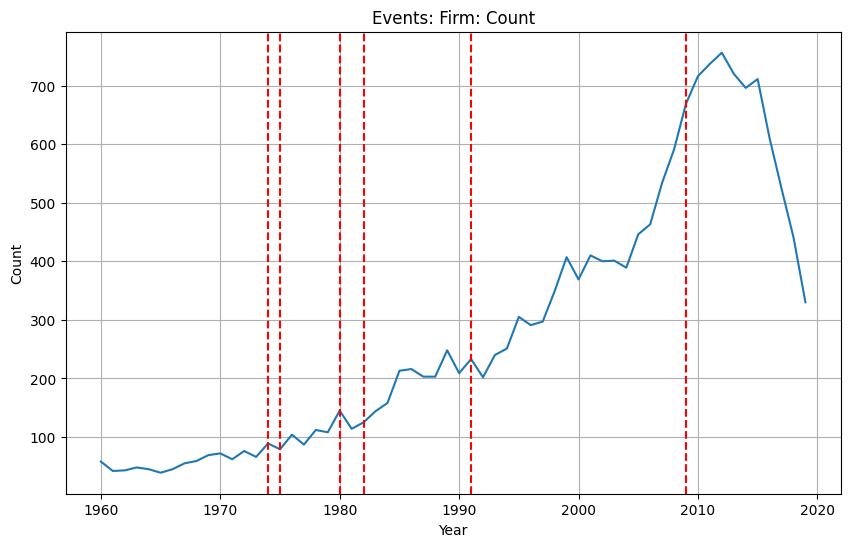

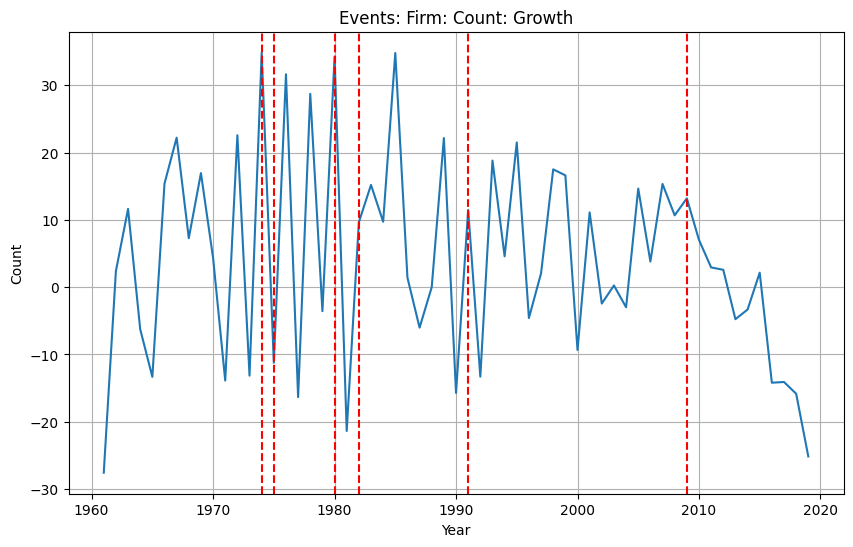

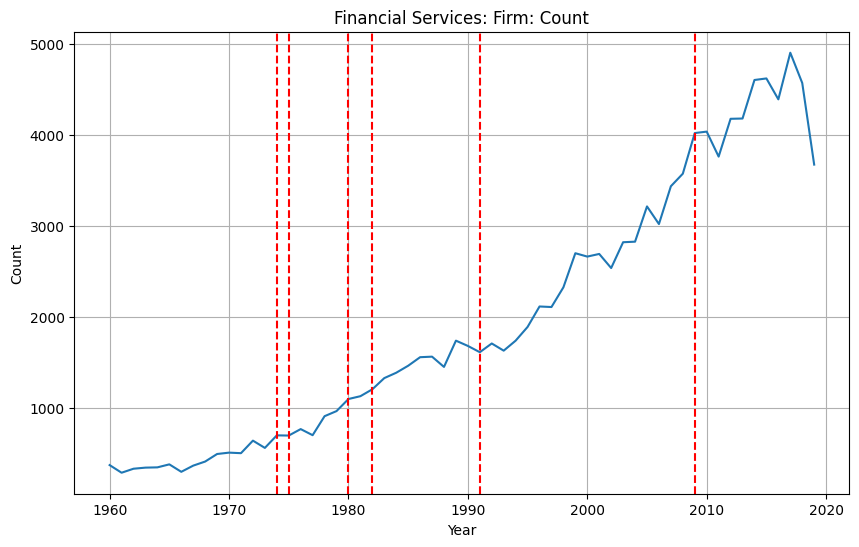

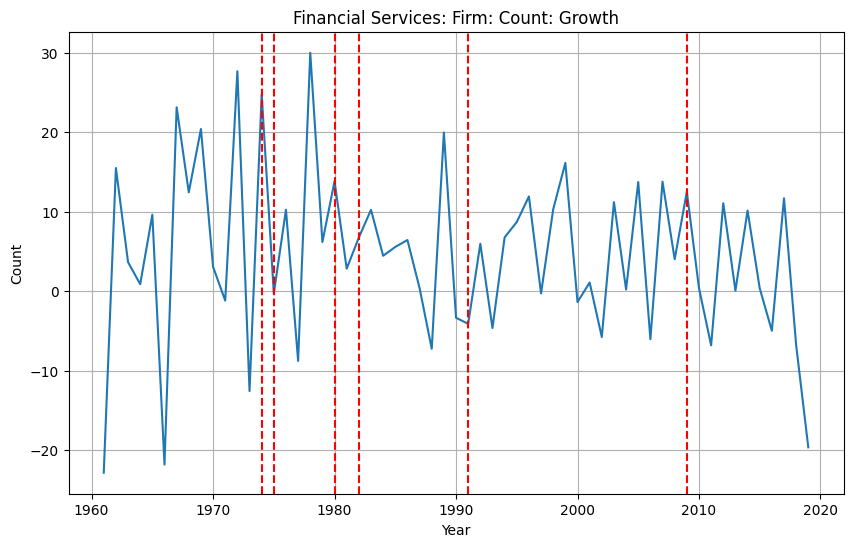

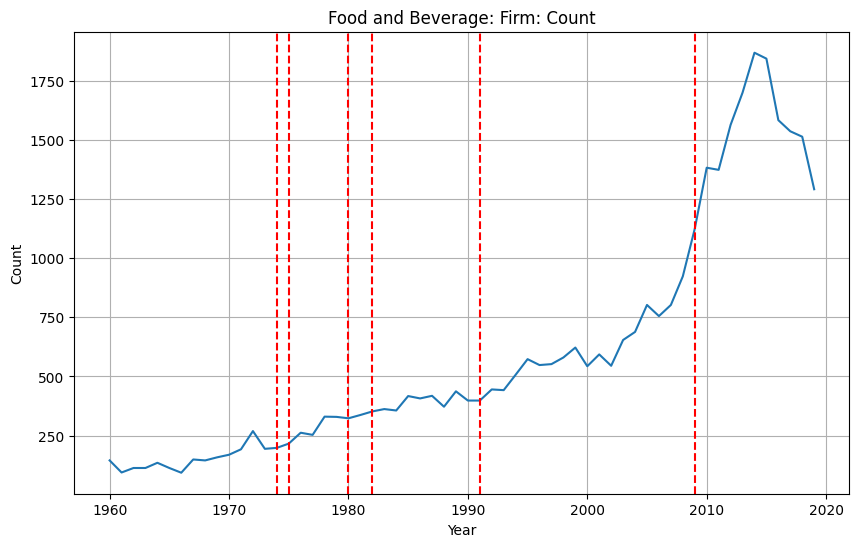

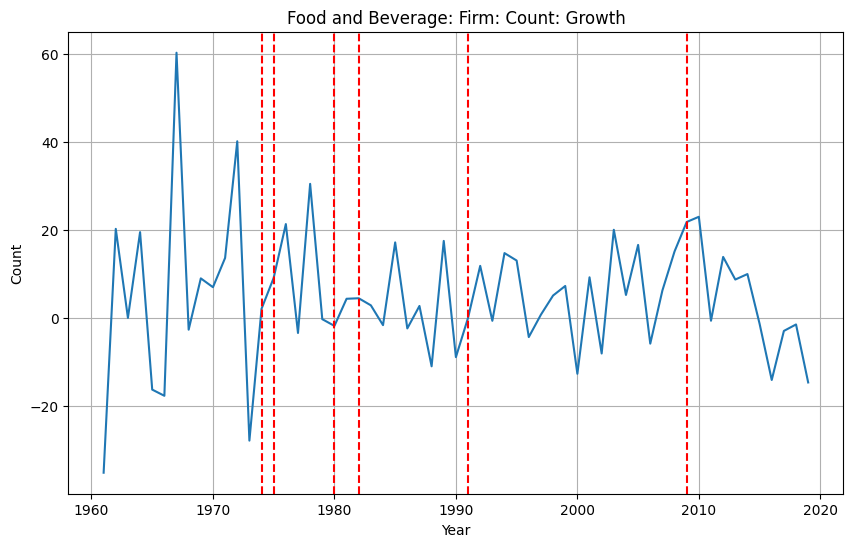

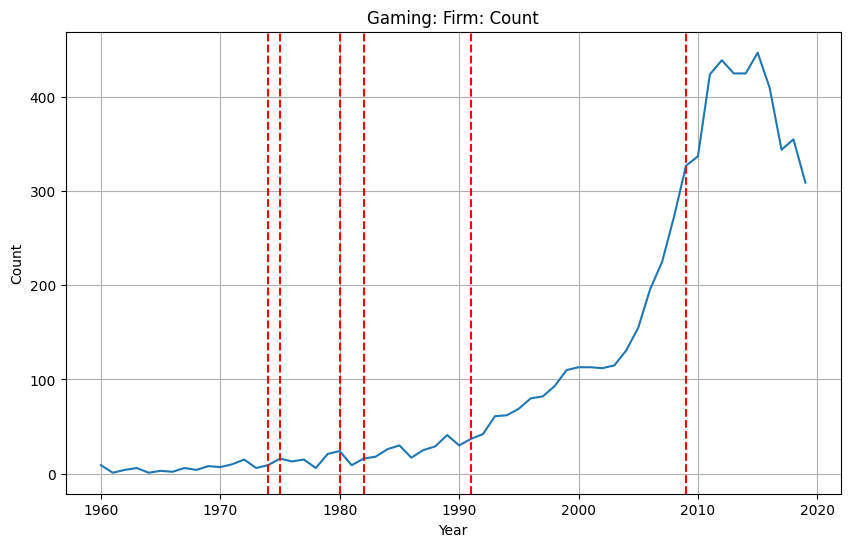

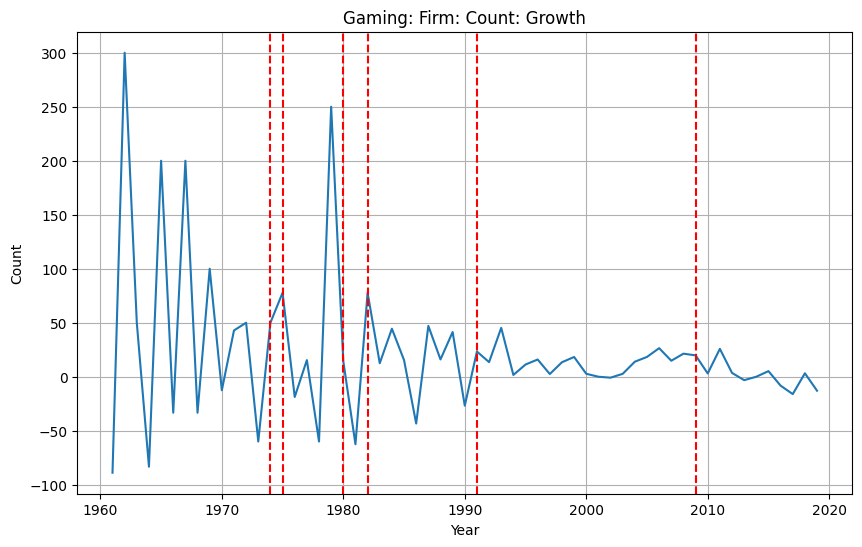

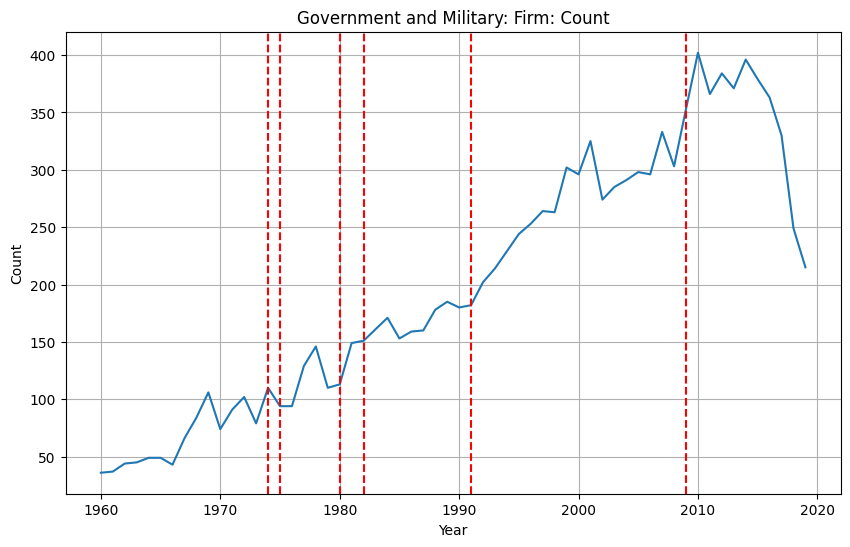

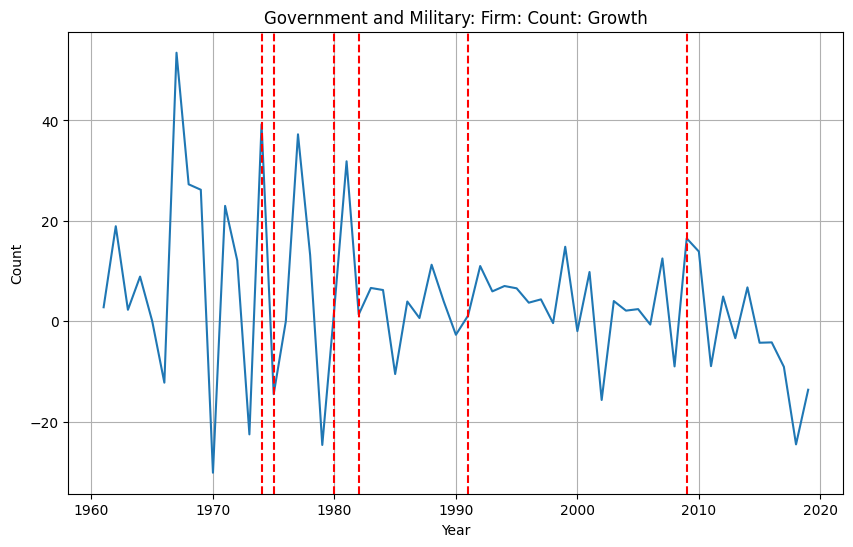

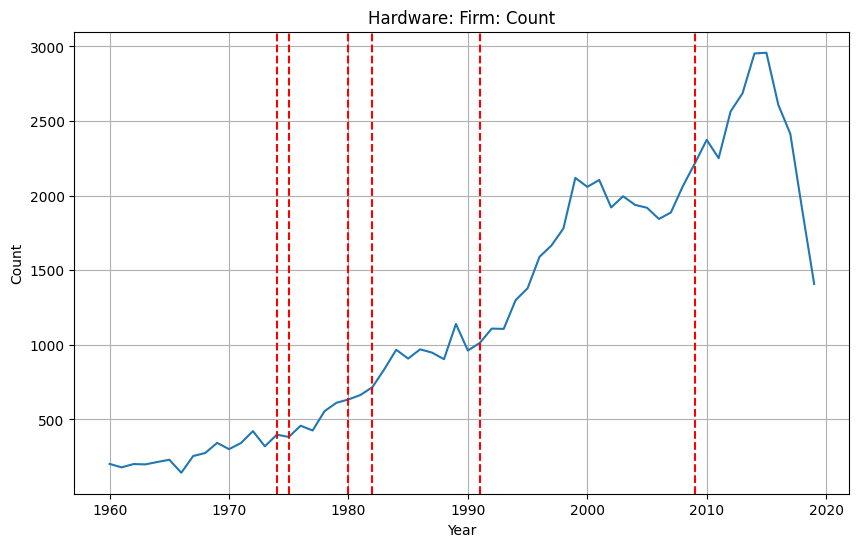

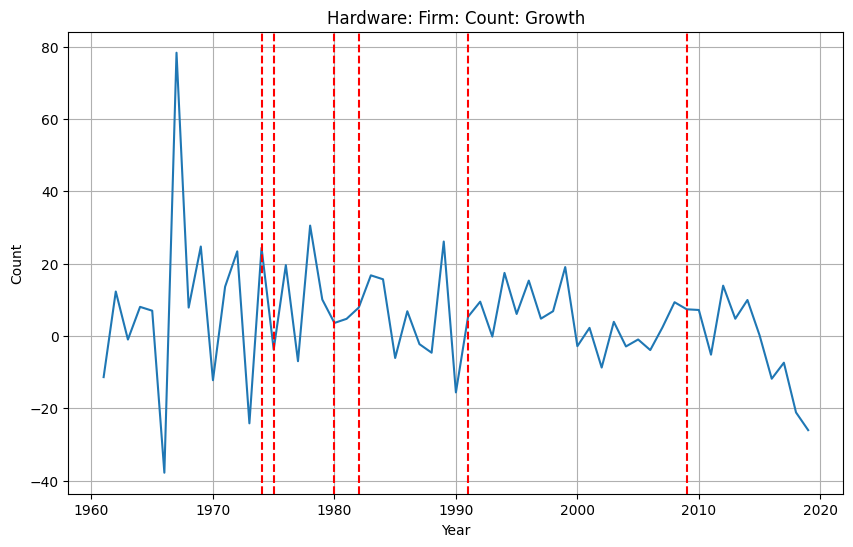

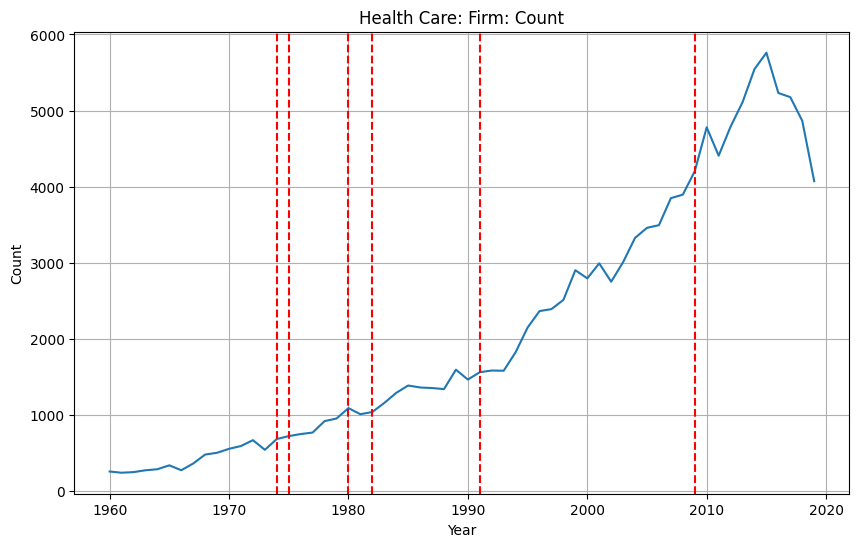

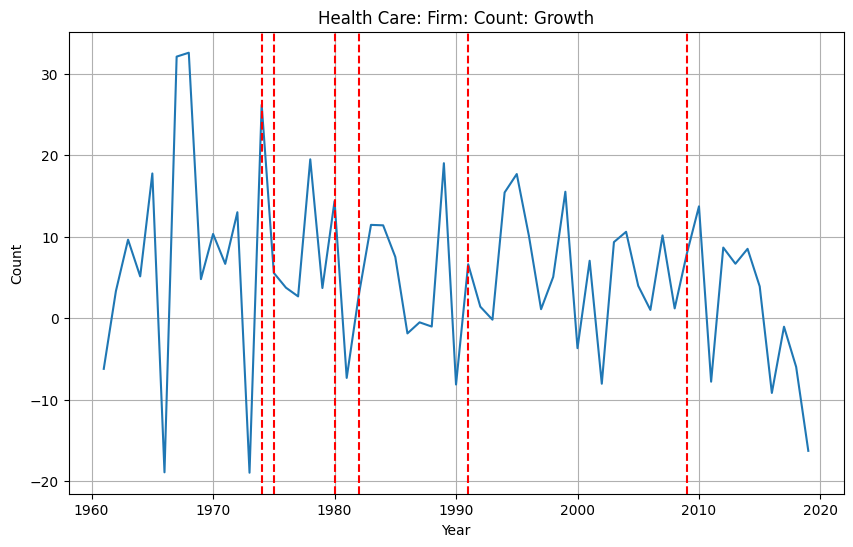

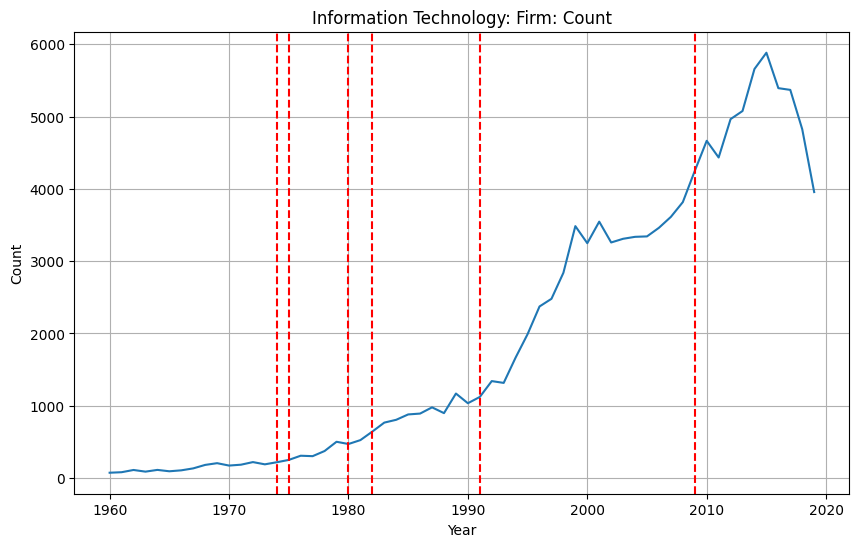

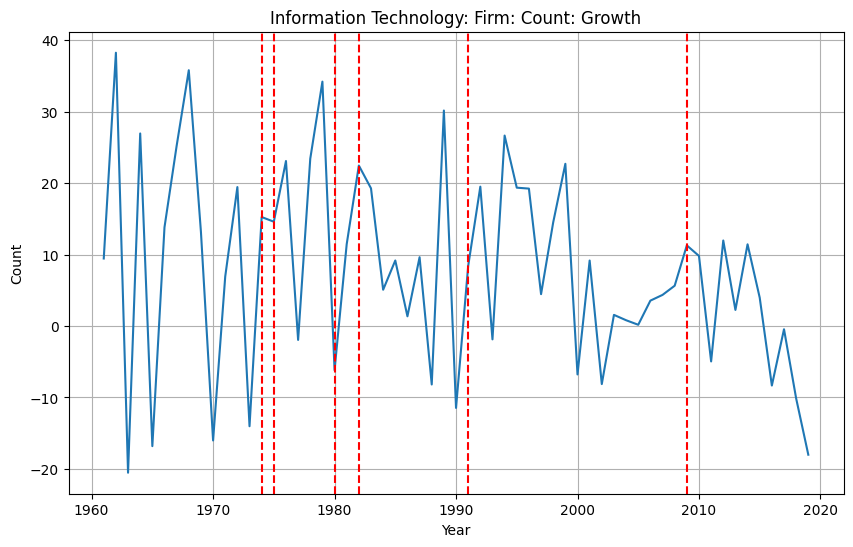

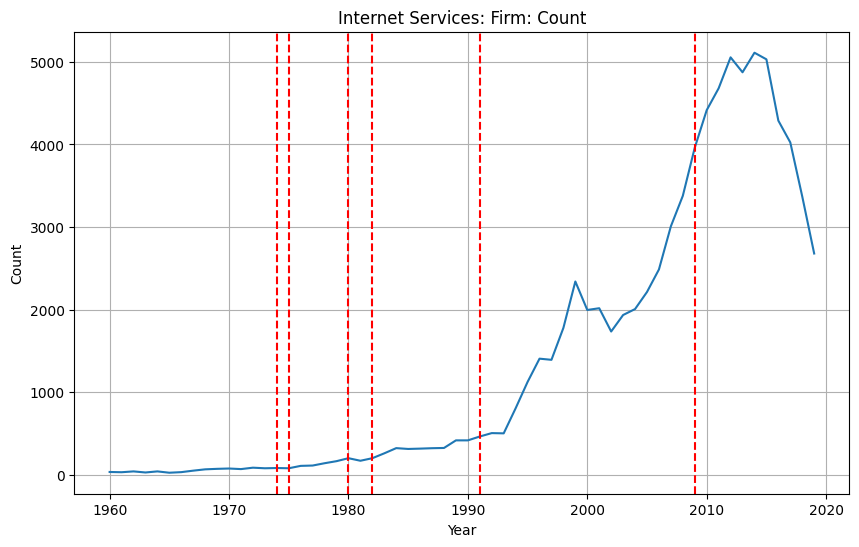

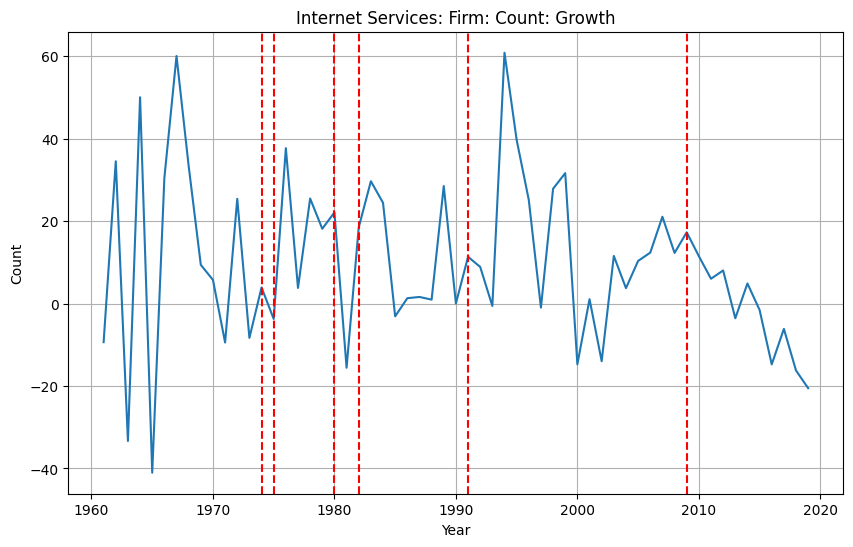

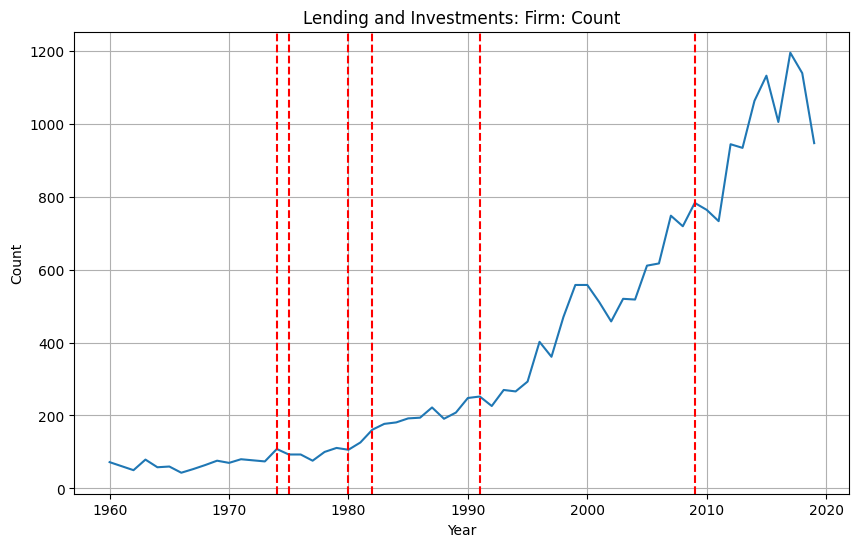

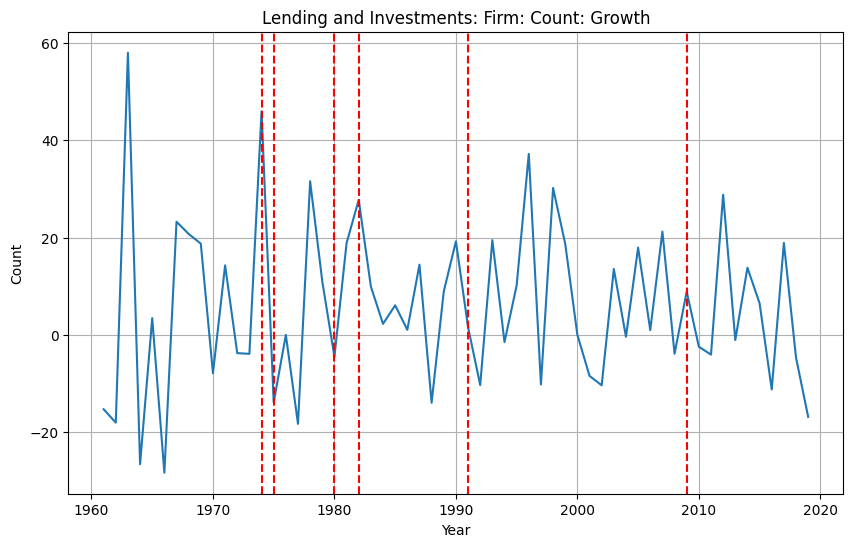

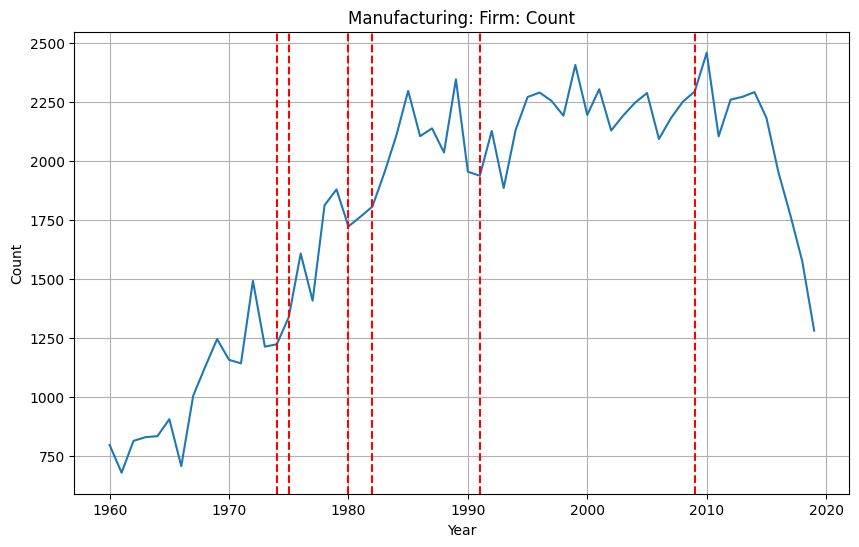

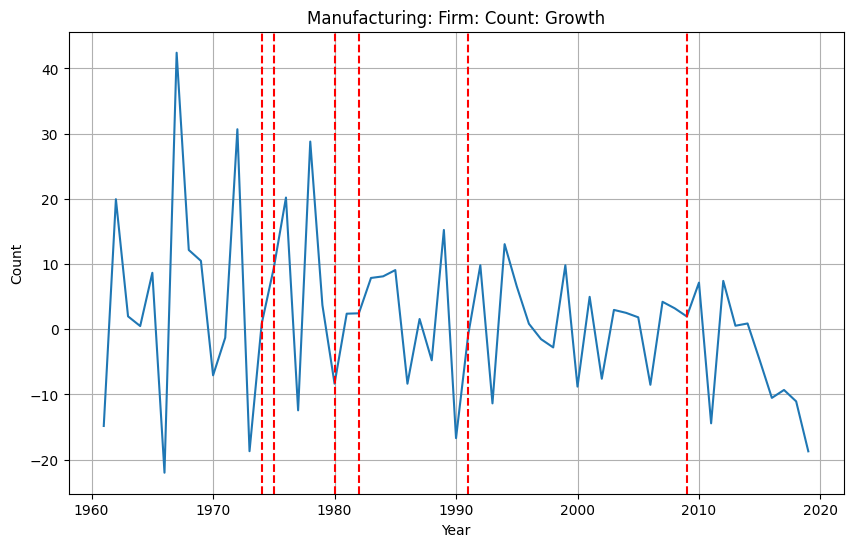

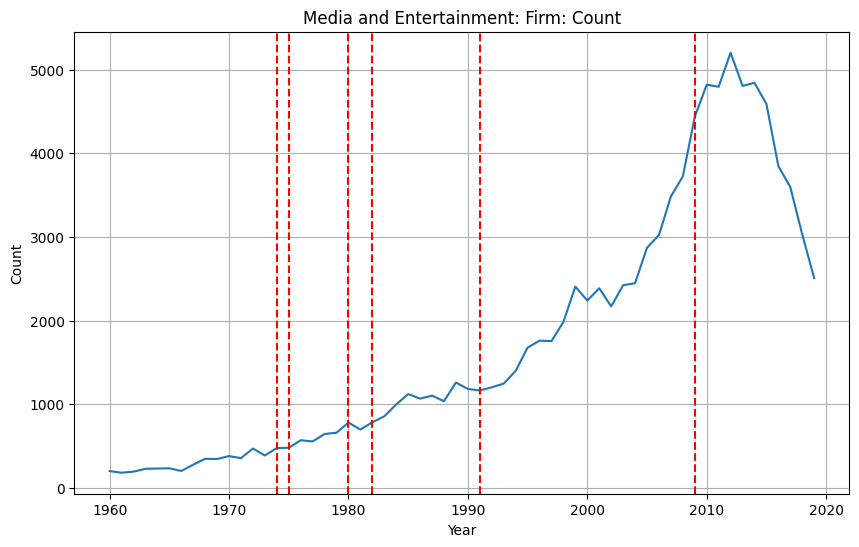

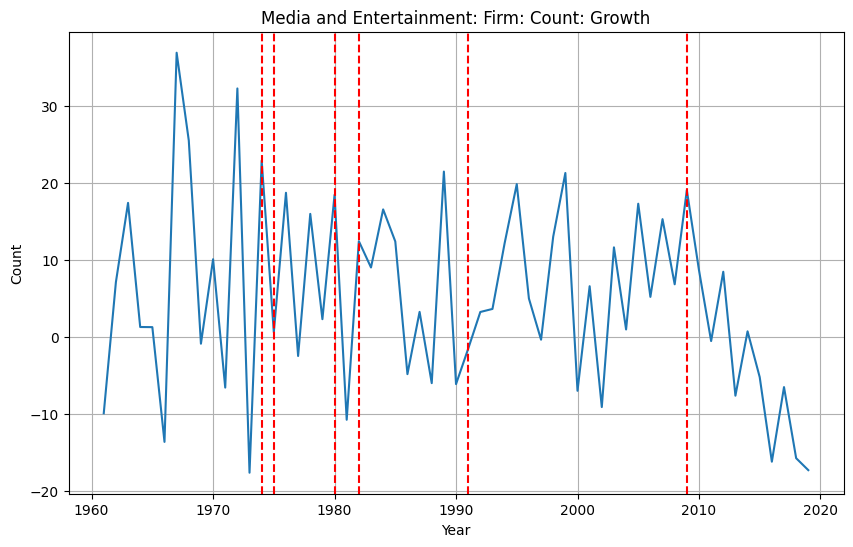

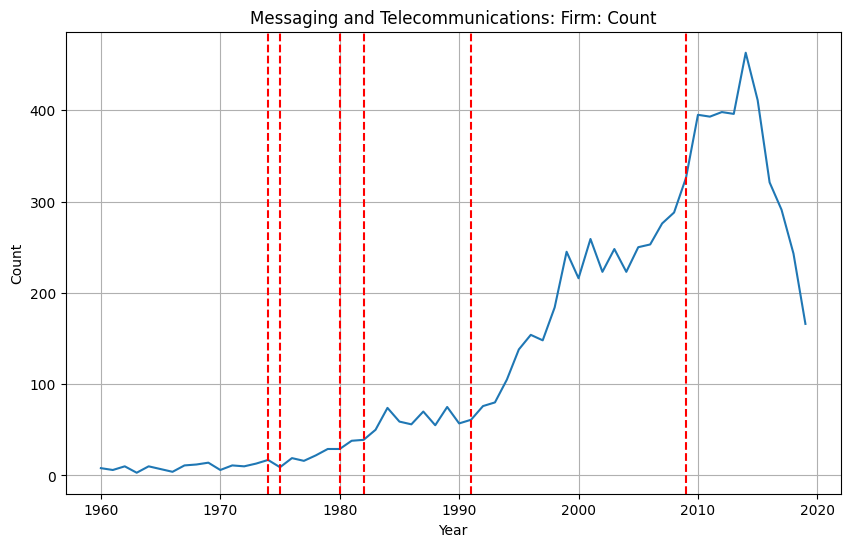

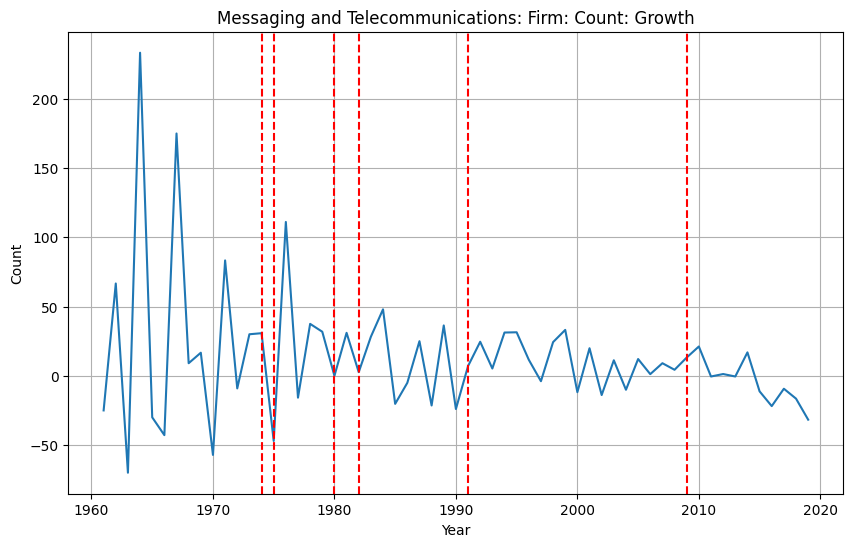

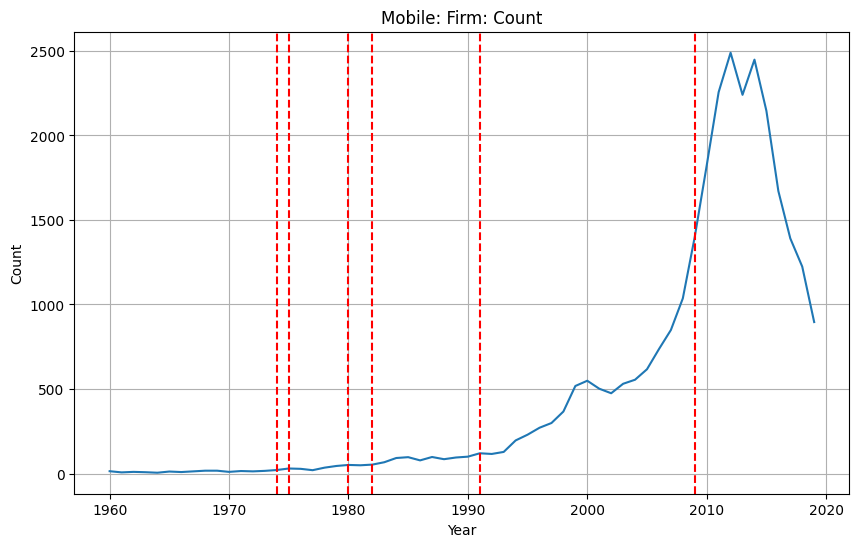

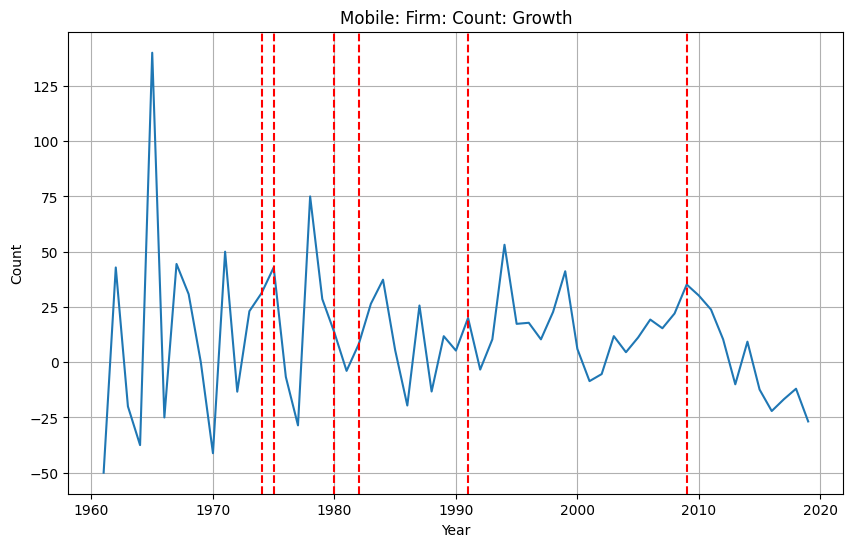

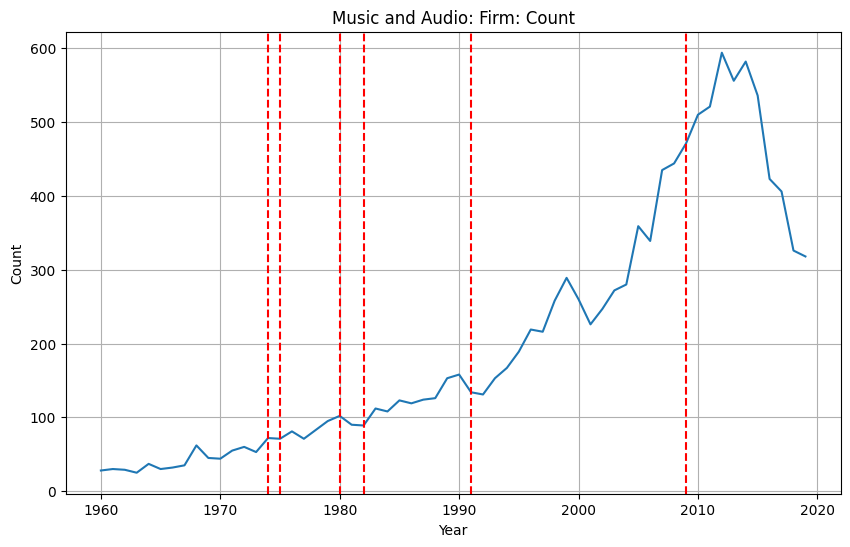

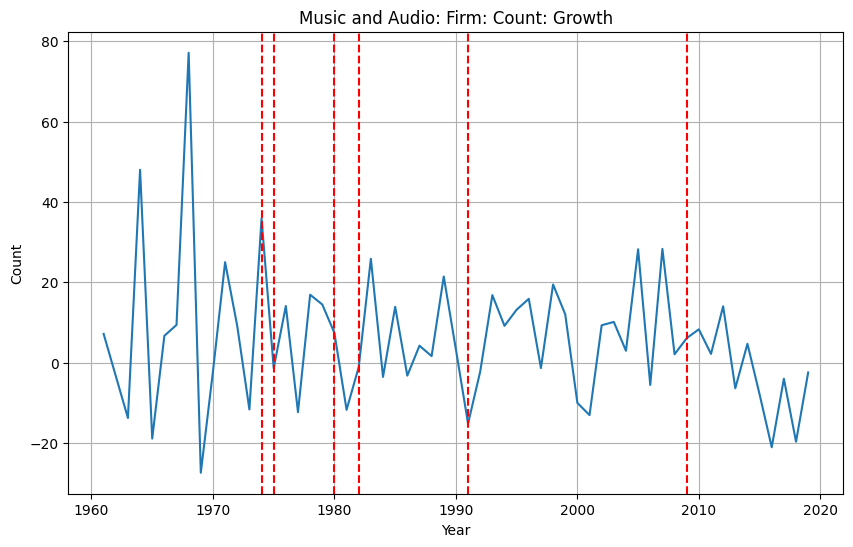

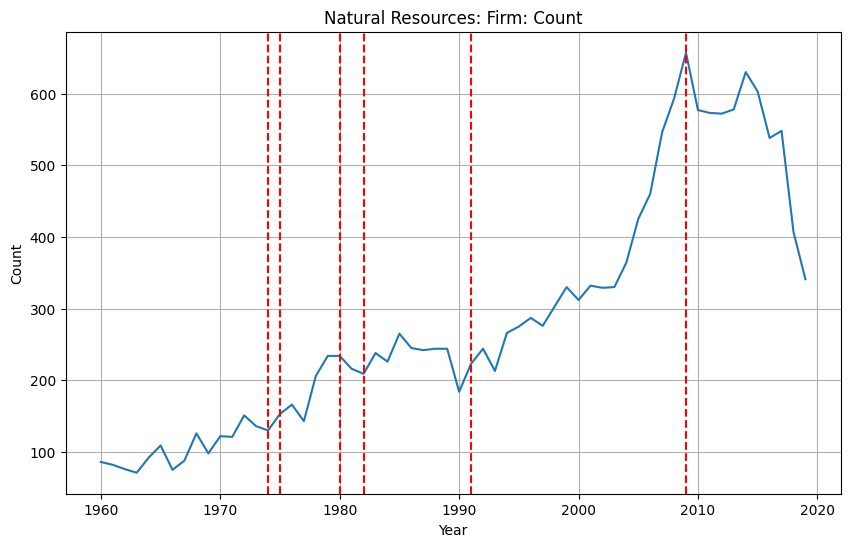

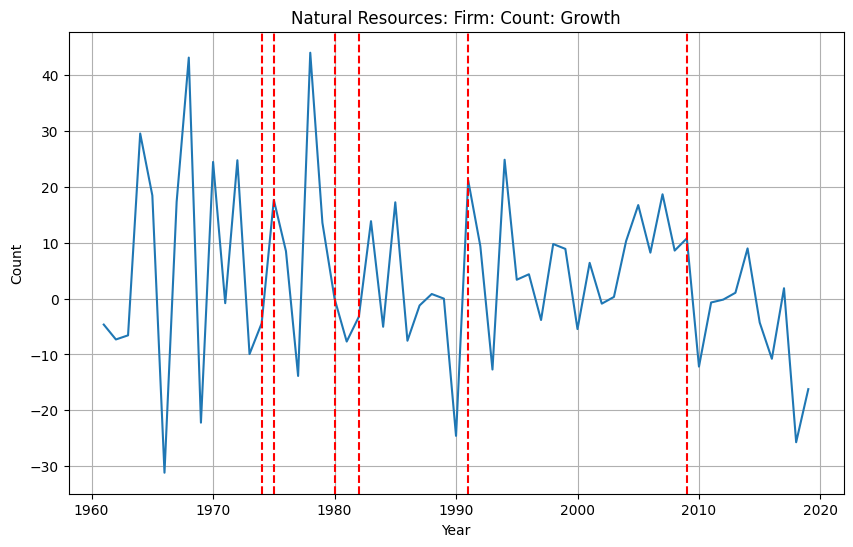

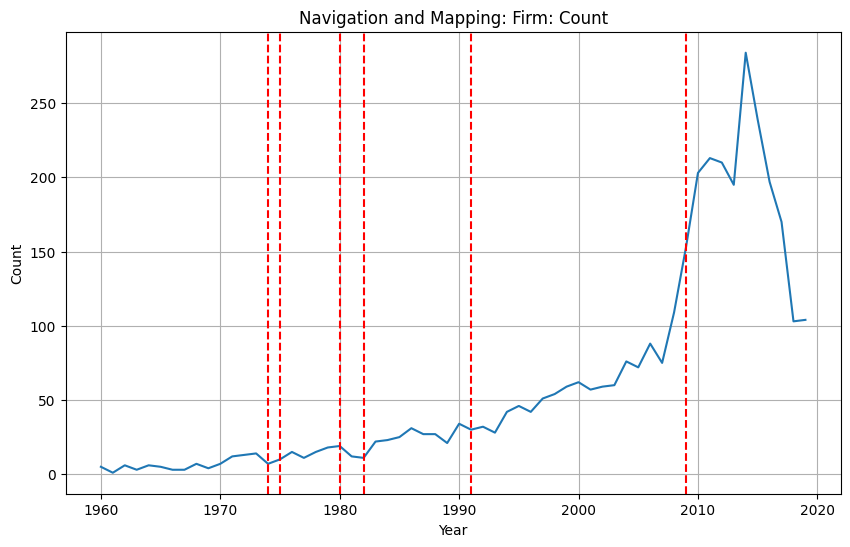

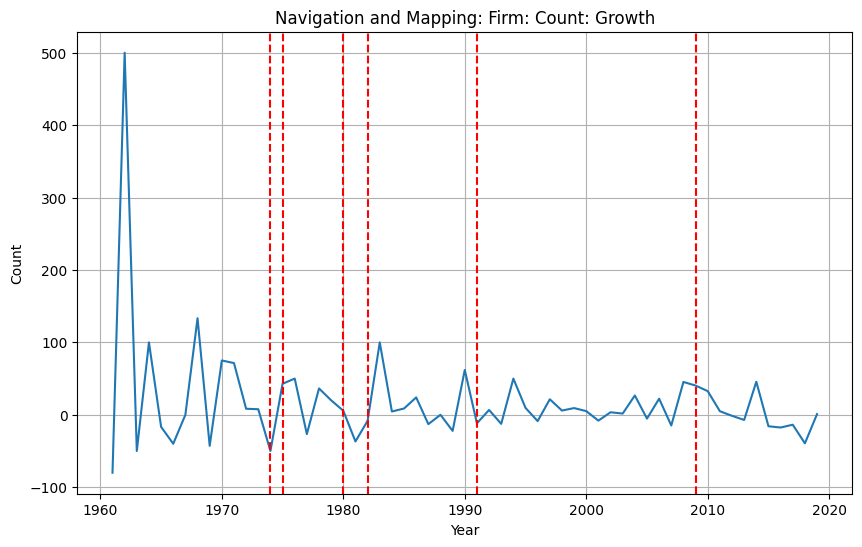

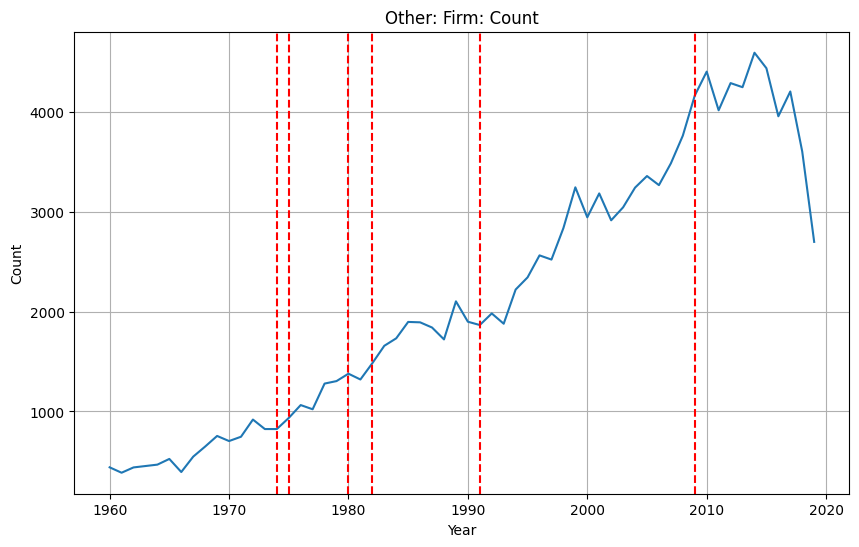

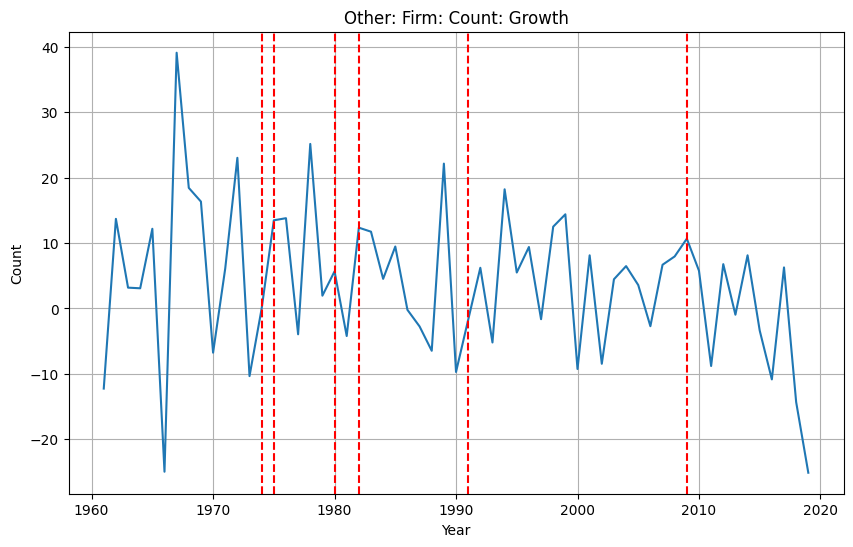

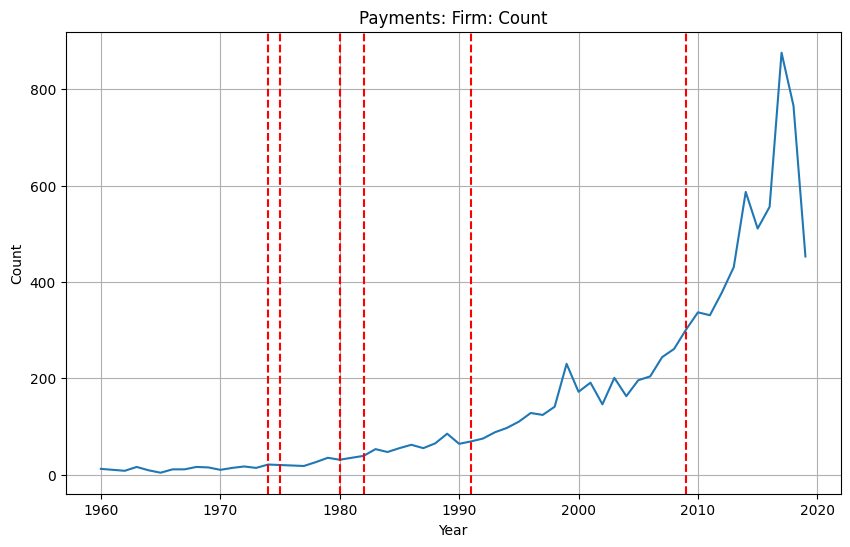

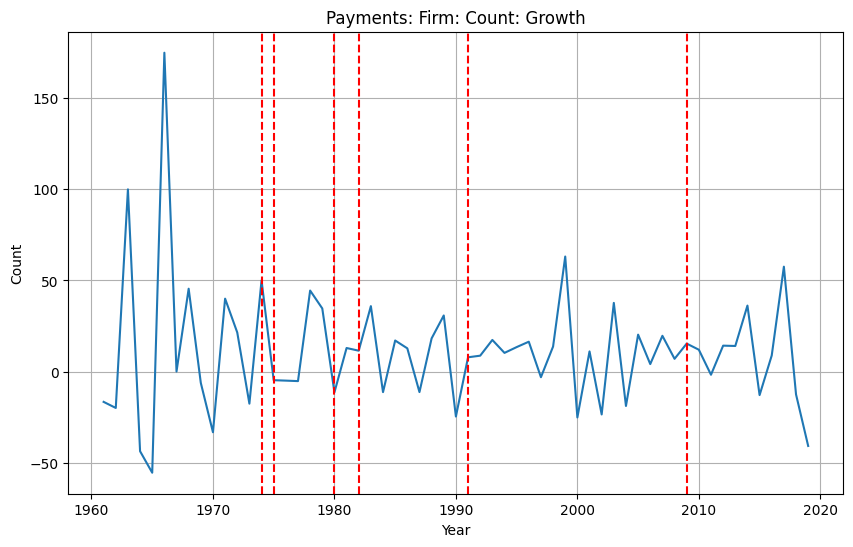

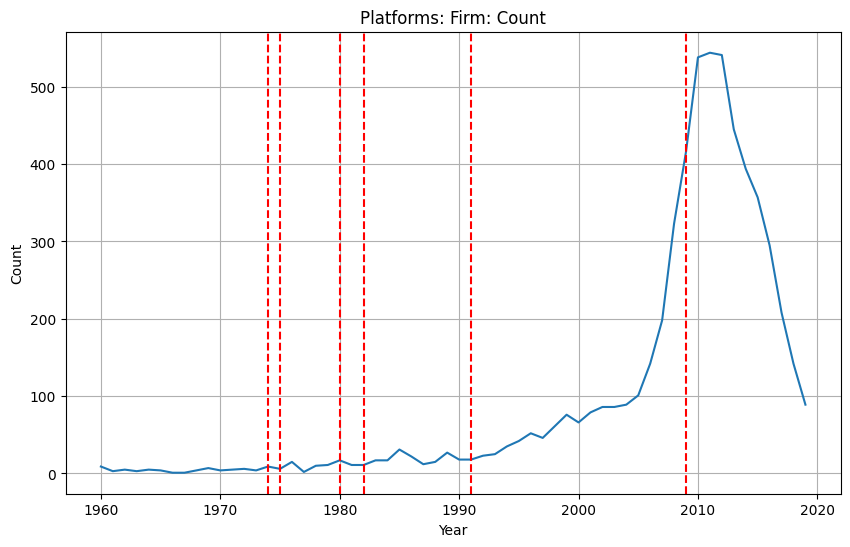

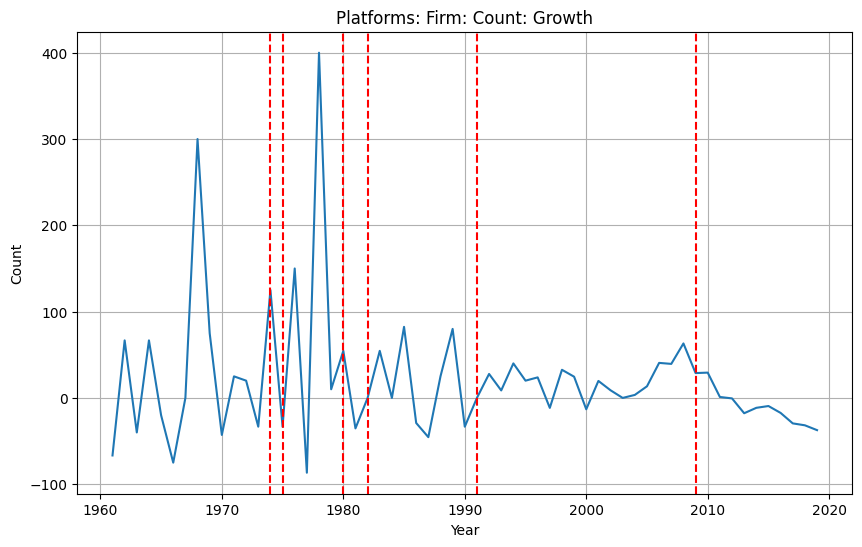

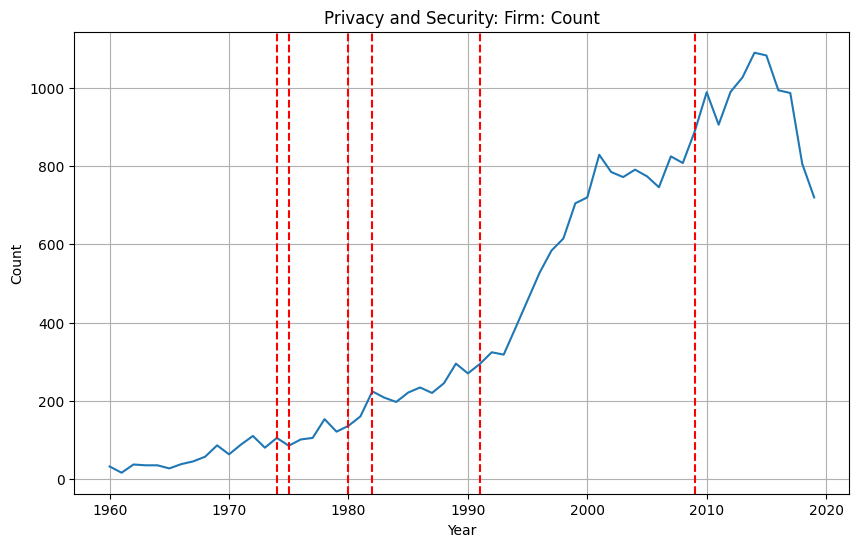

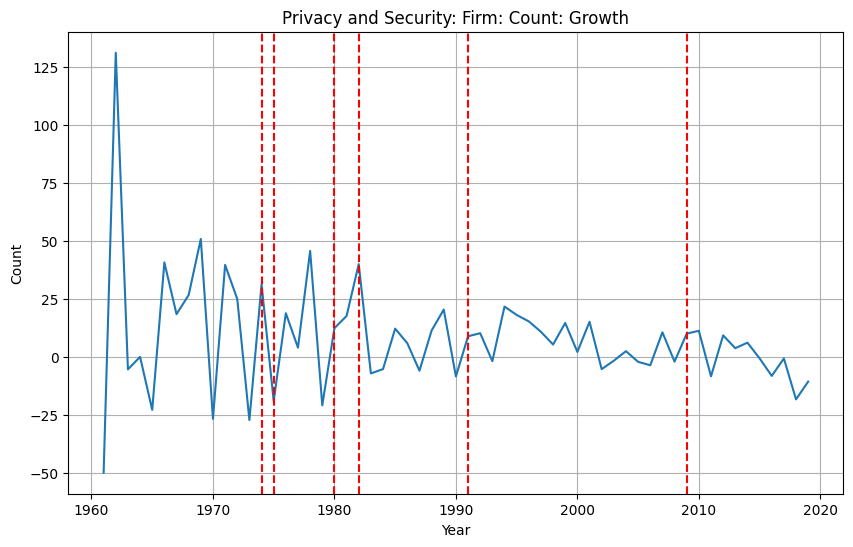

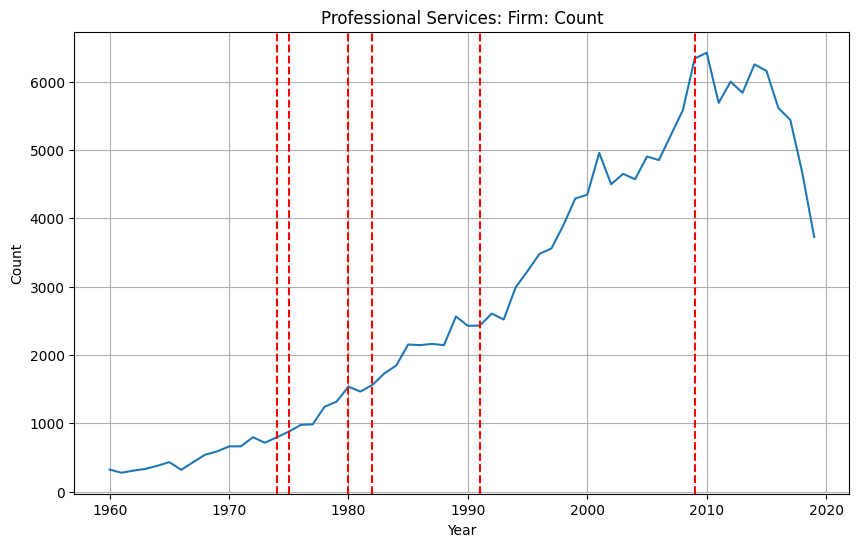

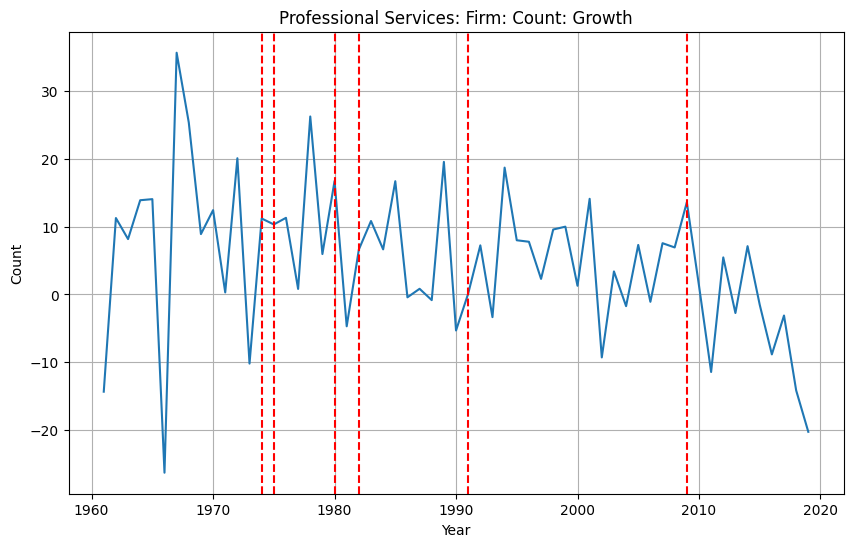

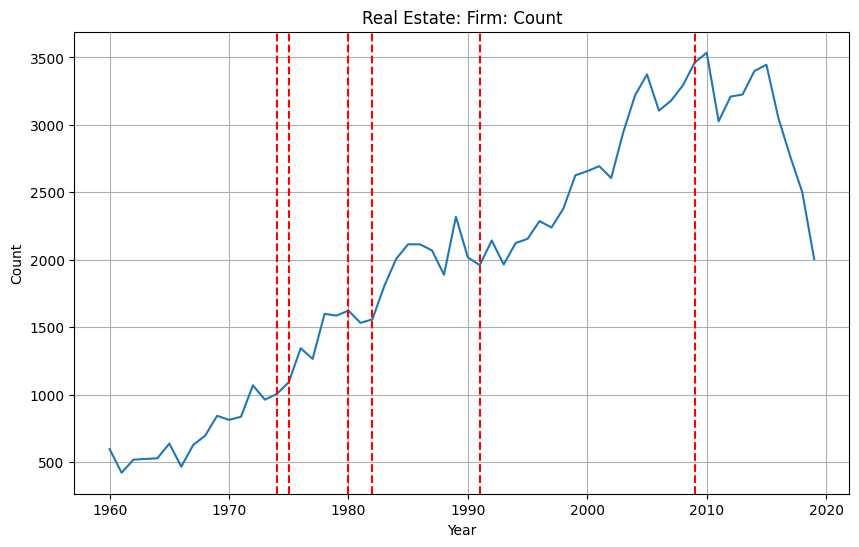

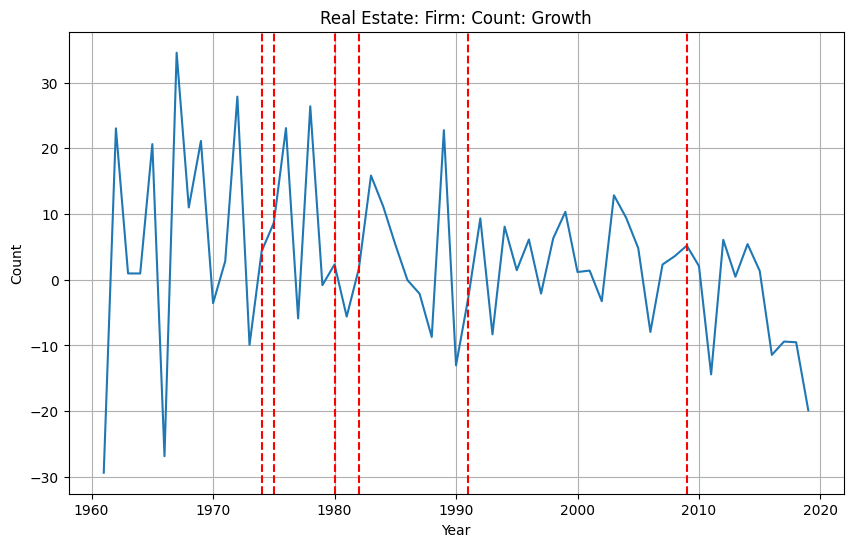

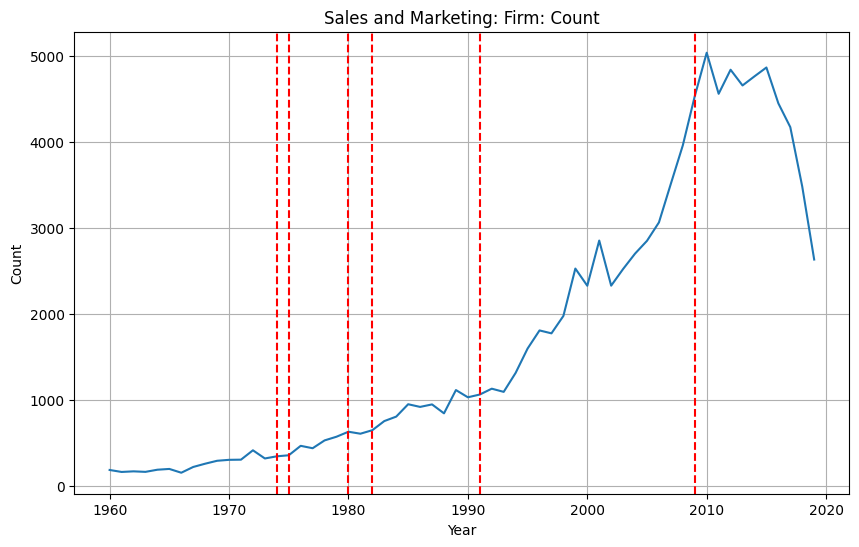

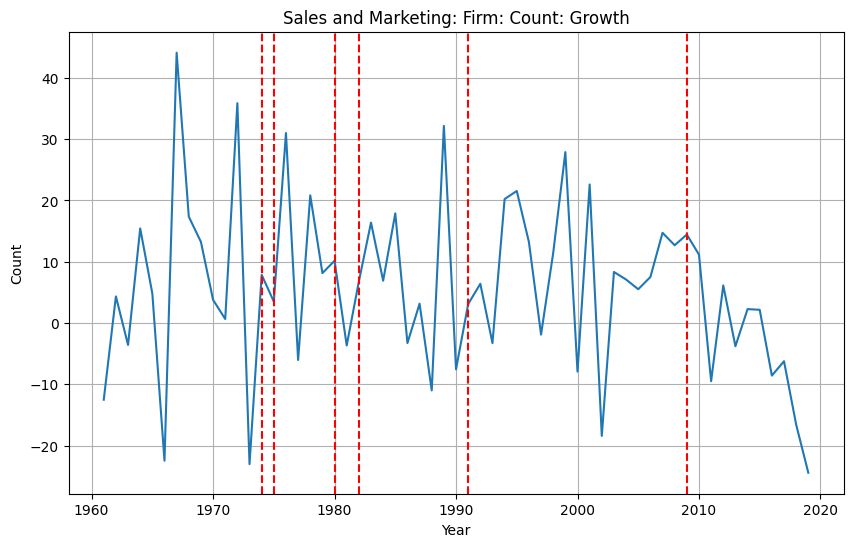

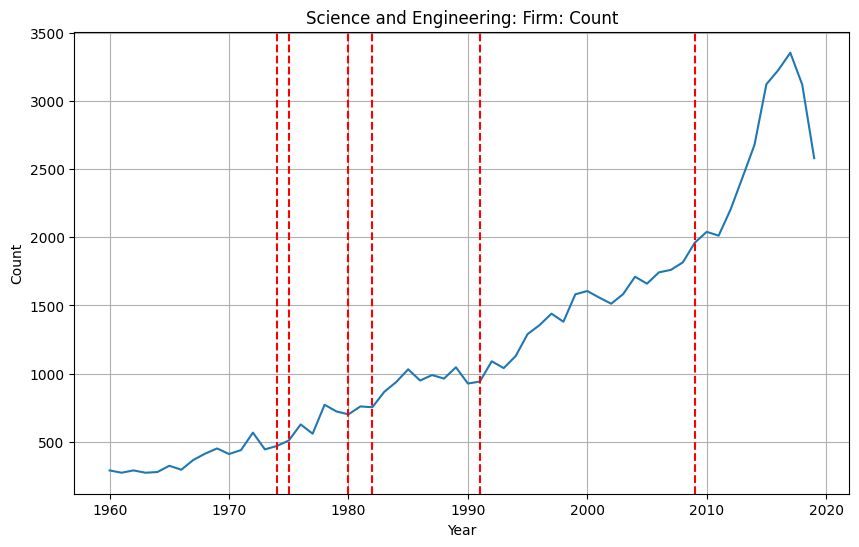

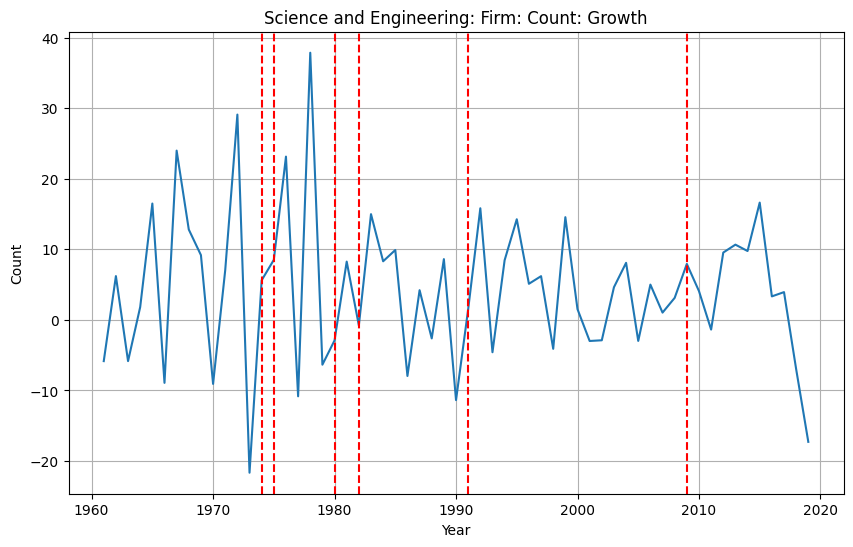

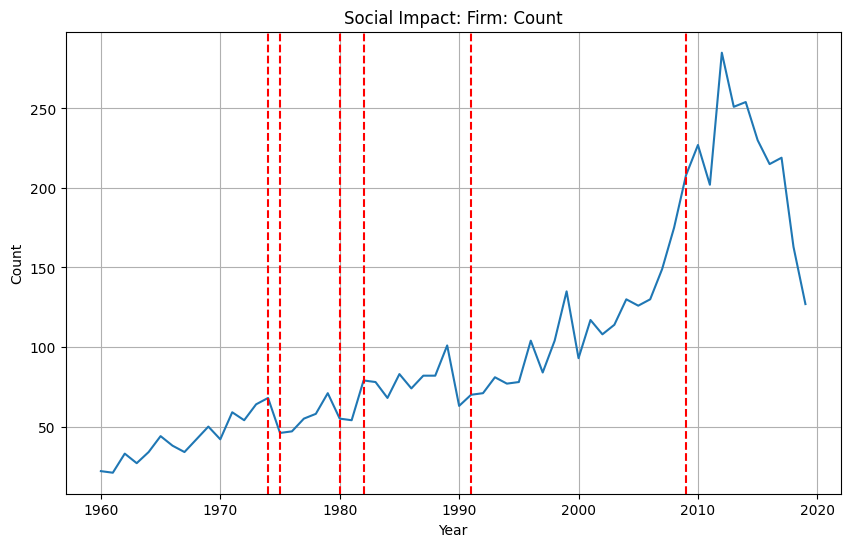

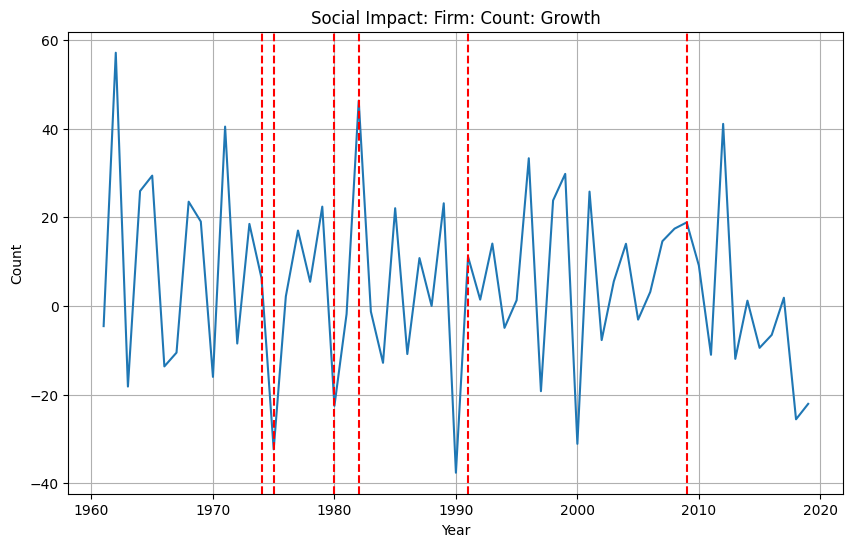

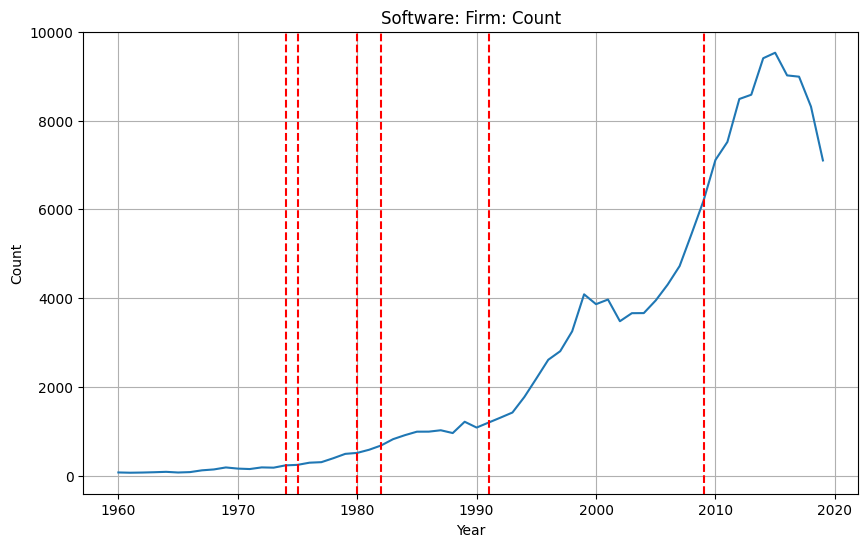

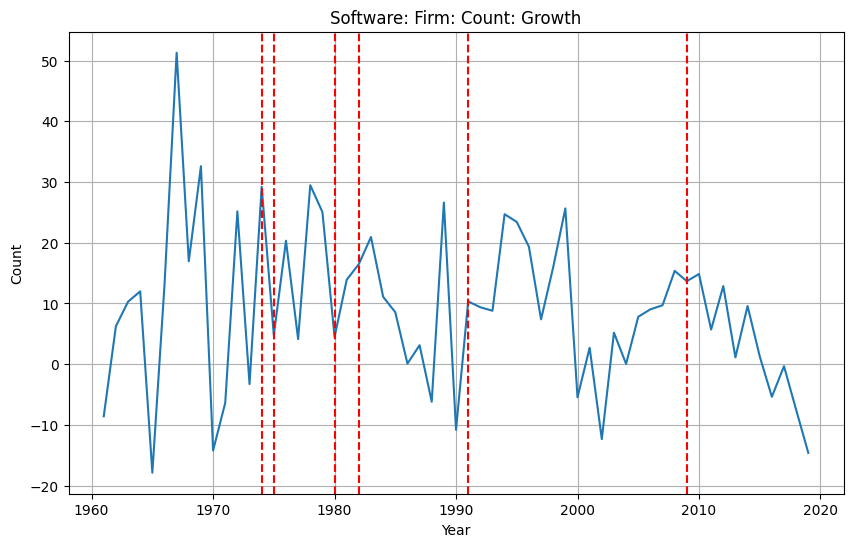

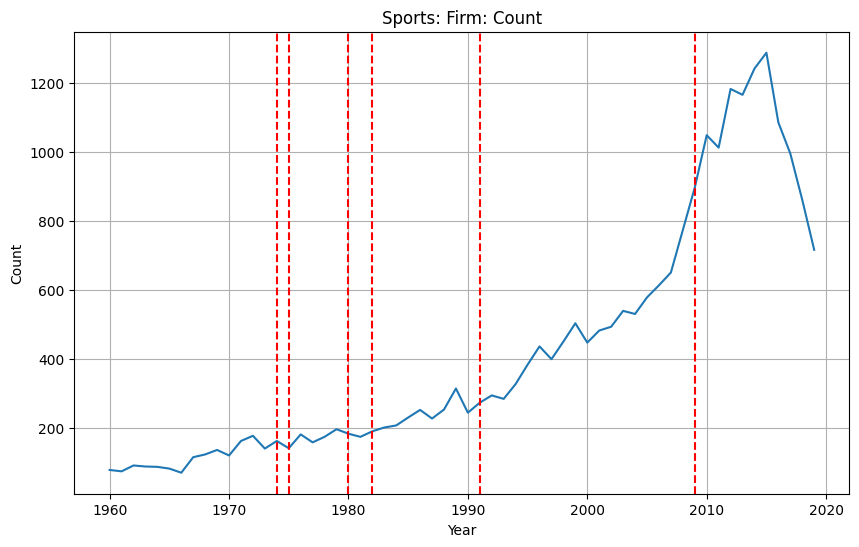

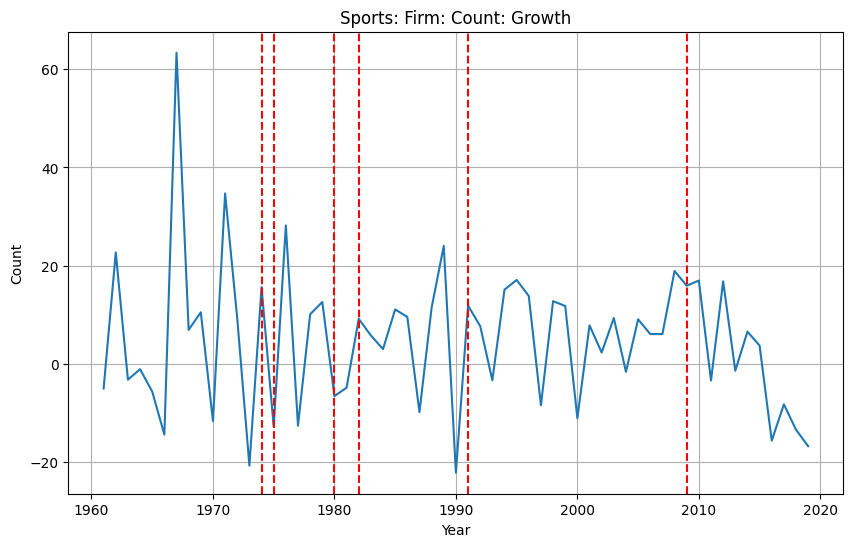

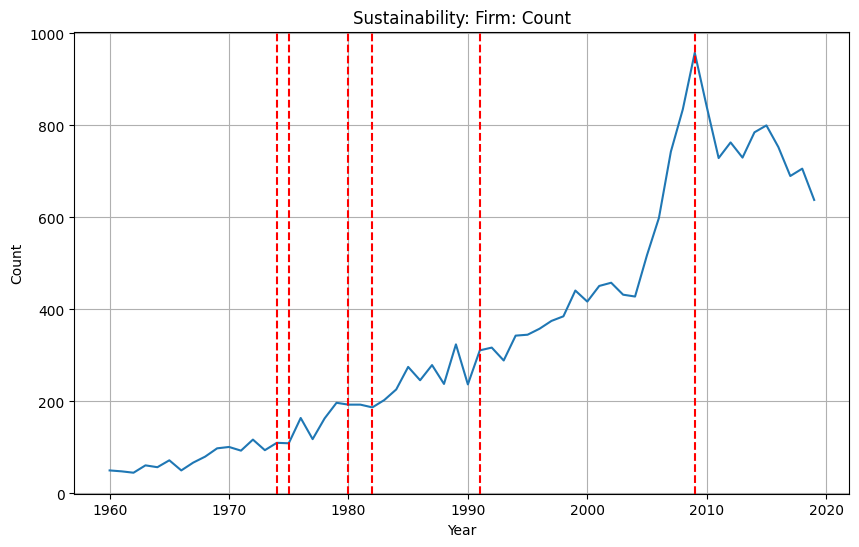

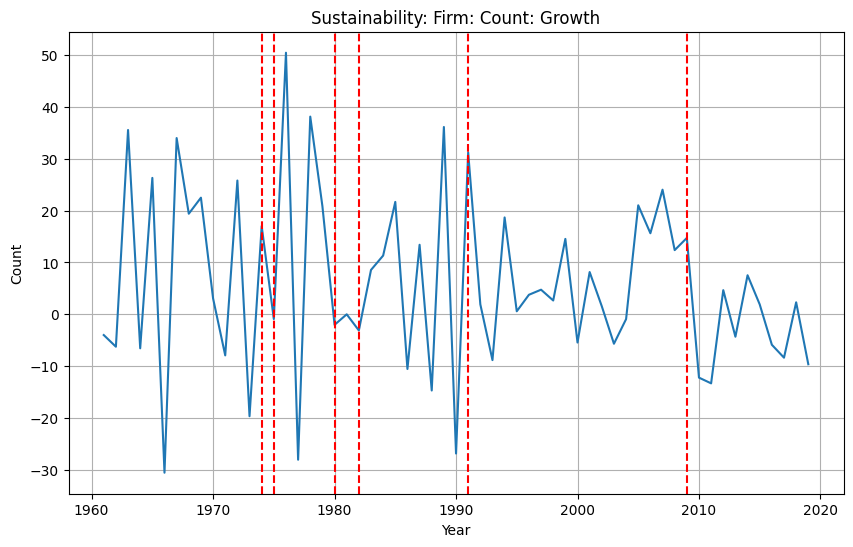

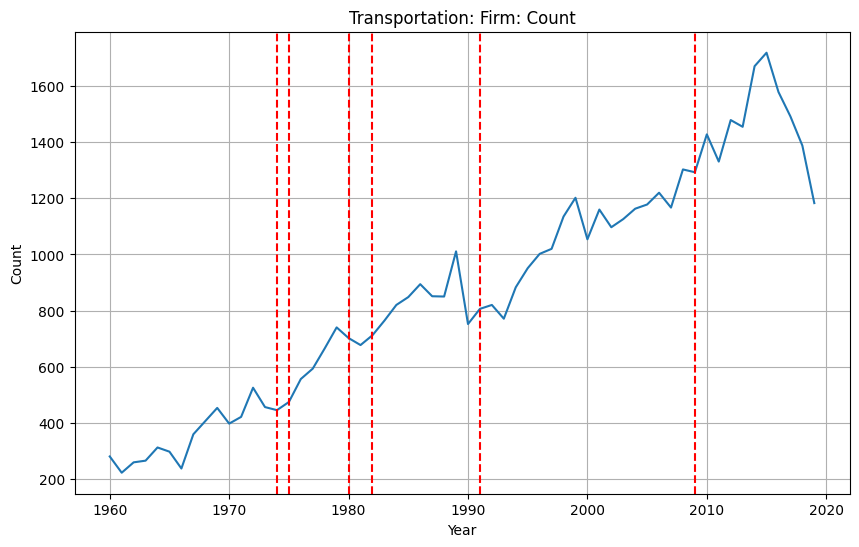

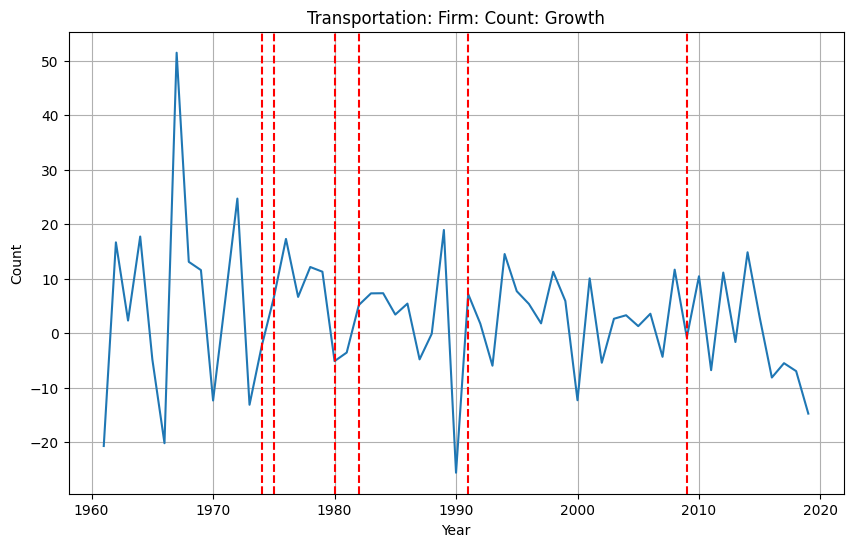

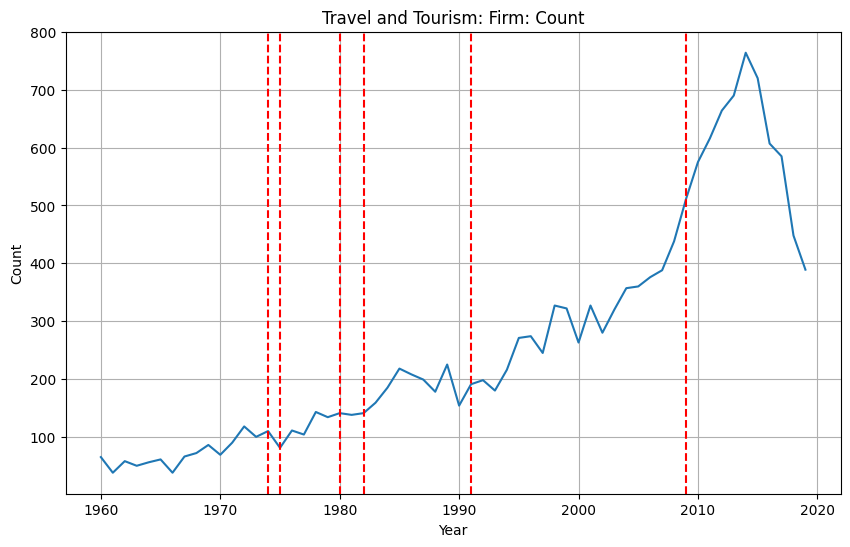

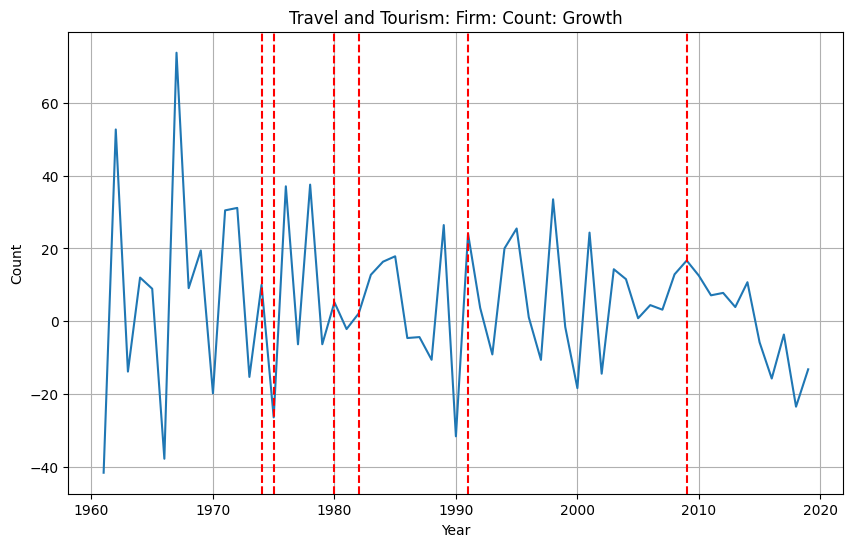

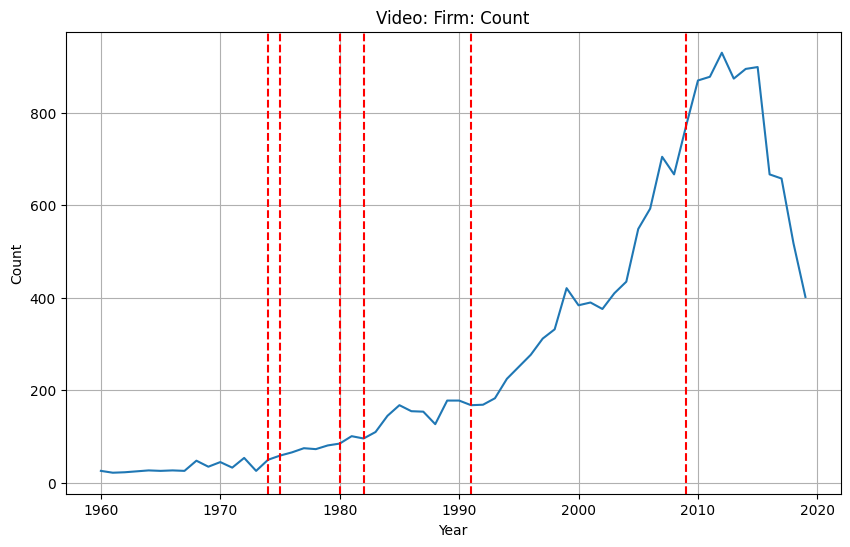

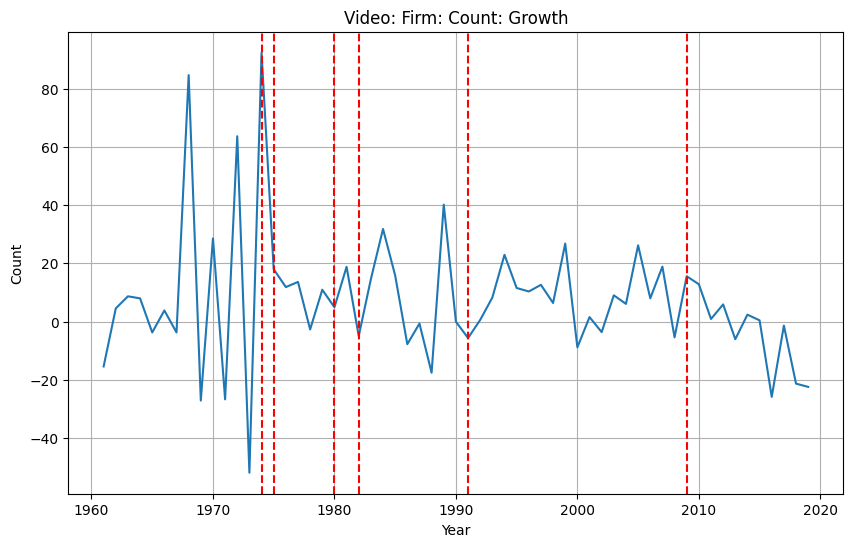

In [19]:
importlib.reload(FirmVisuals)
importlib.reload(Visualiser)
importlib.reload(CommonUtils)
importlib.reload(VisualConstants)
importlib.reload(IndustryVisuals)

industry = IndustryVisuals()

industry_group_count = {}
for industry_group in industry.industry_groups:
  industry_group_year_count, industry_group_year_count_growth = \
    FirmVisuals.plot_industry_group(firms, industry_group, macro, compare=False)
  industry_group_count[industry_group] = industry_group_year_count.sum()

industry_group_count = CommonUtils.sort_dict(industry_group_count)

print()

  

NameError: name 'get_grouped_count' is not defined

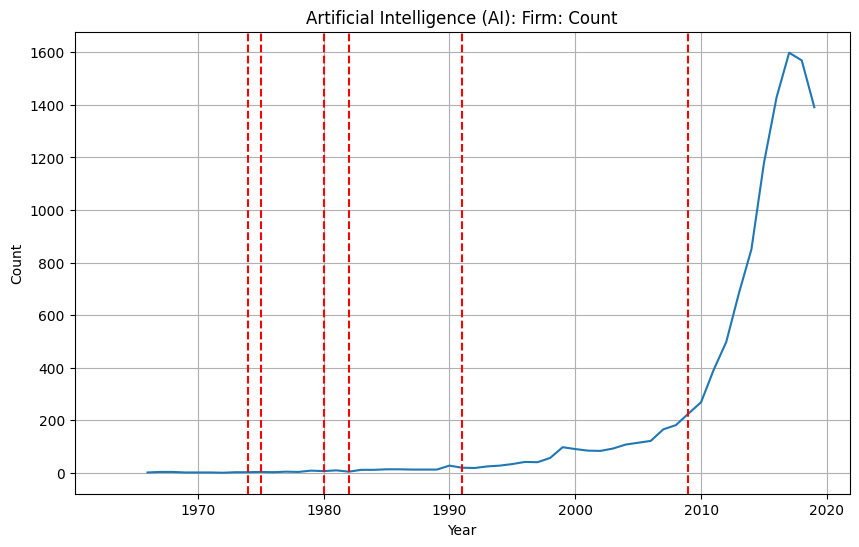

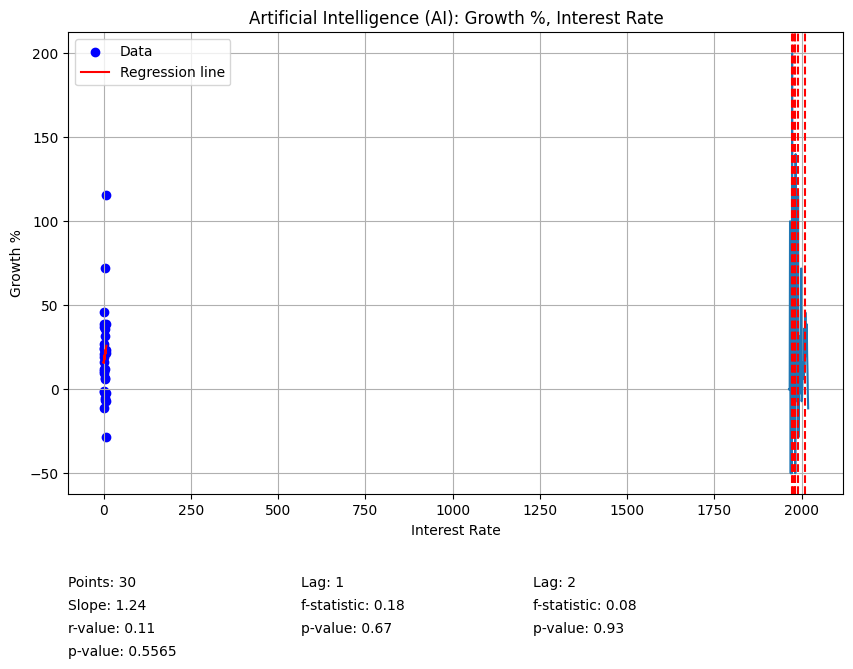

In [16]:
FirmVisuals.plot_industry_group(firms, 'Artificial Intelligence (AI)', macro)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Biotechnology', fed_rate)

AttributeError: module 'utils.dataframe' has no attribute 'get_public_year_count'

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Sustainability', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Blockchain and Cryptocurrency', fed_rate)

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Science and Engineering', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Administrative Services', fed_rate)

In [ ]:
IndustryVisuals.IndustryVisuals.IndustryVisuals.IndustryVisuals.visualise_industry_group(firms, 'Financial Services', fed_rate)

In [ ]:
IndustryVisuals.visualise_industry_group(firms, 'Manufacturing', fed_rate)

### Funding: All

In [ ]:
funding_year_count, funding_year_count_growth = DataframeUtils.get_year_count(funding, FundingConstants.year_label)
funding_year_sum, funding_year_sum_growth = DataframeUtils.get_year_sum(funding, FundingConstants.year_label, FundingConstants.raised_label)

Visualiser.plot(funding_year_count, 'Funding: Count', 'Count', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_count_growth, 'Funding: Count: Growth', 'Growth', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_sum, 'Funding: Money Raised', 'Sum', year_start=1990, highlight=recessions)
Visualiser.plot(funding_year_sum_growth, 'Funding: Money Raised: Growth', 'Growth', year_start=1990, highlight=recessions)

### Funding: STEM and Public Funded

In [ ]:
# funding_STEM_year_sum_percent = DataframeUtils.get_STEM_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)
# funding_public_year_sum_percent = DataframeUtils.get_public_funded_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)
# funding_STEM_public_funded_year_sum_percent = DataframeUtils.get_STEM_public_year_percent(funding, FundingConstants.year_label, FundingConstants.raised_label)

# Visualiser.stack(funding_STEM_year_sum_percent, 'STEM Funding: Sum: Percent', '%', STEM_stack_labels, colors=STEM_colors, year_start=1990)
# Visualiser.stack(funding_public_year_sum_percent, 'Public Funding: Sum: Percent', '%', public_funded_stack_labels, colors=public_funded_colors, year_start=1990)
# Visualiser.stack(funding_STEM_public_funded_year_sum_percent, 'STEM Public Funding: Sum: Percent', '%', ['Not STEM Private Funded', 'STEM Private Funded', 'Not STEM Public Funded', 'STEM Public Funded'], colors=STEM_public_year_percent_colors, year_start=1990)
FundingVisuals.stack_STEM_public_funded(funding)

In [ ]:
macro.regression(funding_year_sum_growth)

### Funding: By Industry